***

# Nagy mennyis√©g≈± adatfeldolgoz√°s

<font size="4">*Projektmunka*</font>

## Bal√°zs Patr√≠cia

<font size="4">Neptun k√≥d: SO168Q</font>

<font size="4">Data k√≥d: 51</font>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

 ***


### Az adathalmaz megismer√©se, a benne szerepl≈ë attrib√∫tumok bemutat√°sa √©s √°ltal√°nos jellemz√©se.


In [2]:
df = pd.read_csv('data51.csv')
df.head(10)

1:Date 2:Time  3:Temperature_Comedor_Sensor  \
0  13/03/2012  11:45                       18.1875   
1  13/03/2012  12:00                       18.4633   
2  13/03/2012  12:15                       18.7673   
3  13/03/2012  12:30                       19.0727   
4  13/03/2012  12:45                       19.3721   
5  13/03/2012  13:00                       19.6407   
6  13/03/2012  13:15                       19.9120   
7  13/03/2012  13:30                       20.1640   
8  13/03/2012  13:45                       20.4120   
9  13/03/2012  14:00                       20.6400   

   4:Temperature_Habitacion_Sensor  5:Weather_Temperature  \
0                          17.8275                    0.0   
1                          18.1207                    6.8   
2                          18.4367                   17.0   
3                          18.7513                   18.0   
4                          19.0414                   20.0   
5                          19.2773                   20.0   
6                          19.5367                   20.0   
7                          19.7307                   20.0   
8                          19.9693                   20.0   
9                          20.1407                   20.0   

   6:CO2_Comedor_Sensor  7:CO2_Habitacion_Sensor  8:Humedad_Comedor_Sensor  \
0               216.560                  221.920                   39.9125   
1               219.947                  220.363                   39.9267   
2               219.403                  218.933                   39.7720   
3               218.613                  217.045                   39.7760   
4               217.714                  216.080                   39.7757   
5               218.389                  216.011                   39.8107   
6               218.155                  215.829                   39.8613   
7               216.661                  215.296                   39.8240   
8               217.461                  214.549                   39.9587   
9               215.349                  213.909                   39.9400   

   9:Humedad_Habitacion_Sensor  10:Lighting_Comedor_Sensor  ...  \
0                      42.4150                     81.6650  ...   
1                      42.2453                     81.7413  ...   
2                      42.2267                     81.4240  ...   
3                      42.0987                     81.5013  ...   
4                      42.0686                     81.4657  ...   
5                      42.0347                     81.2427  ...   
6                      41.9947                     81.3600  ...   
7                      41.9947                     81.0240  ...   
8                      42.1253                     81.1040  ...   
9                      42.0427                     81.1813  ...   

   15:Meteo_Exterior_Sol_Oest  16:Meteo_Exterior_Sol_Est  \
0                     9690.24                   12604.20   
1                    11022.00                   10787.20   
2                    13960.50                    9669.63   
3                    18511.20                    9648.13   
4                    26349.00                    9208.32   
5                    36511.70                    8694.78   
6                    49288.50                    8501.25   
7                    62253.70                    8687.62   
8                    71453.40                    8888.32   
9                    80076.80                    9046.02   

   17:Meteo_Exterior_Sol_Sud  18:Meteo_Exterior_Piranometro  \
0                    95436.8                        758.880   
1                    95436.8                        762.069   
2                    95398.6                        766.251   
3                    95360.3                        766.037   
4                    95354.9                        762.743   
5                    95354.9                        752.683   
6                    95354.9             

<font size="3">Az adathalmaz k√ºl√∂nb√∂z≈ë k√∂rnyezeti adatokat tartalmaz, mint a leveg≈ë h≈ëm√©rs√©klete, p√°ratartalma, sz√©n-dioxid szintje (‚Ä¶) k√ºls≈ë √©s bels≈ë k√∂rnyezetben. Az egyes rekordok k√ºl√∂nb√∂z≈ë id≈ëpontokban t√∂rt√©n≈ë m√©r√©sek eredm√©nyei.</font>

In [3]:
df.shape

(2764, 24)

<font size="3">Az adathalmaz 2764 rekordb√≥l √©s 24 oszlopb√≥l √©p√ºl fel.</font>

In [4]:
df.columns

Index(['1:Date', '2:Time', '3:Temperature_Comedor_Sensor',
       '4:Temperature_Habitacion_Sensor', '5:Weather_Temperature',
       '6:CO2_Comedor_Sensor', '7:CO2_Habitacion_Sensor',
       '8:Humedad_Comedor_Sensor', '9:Humedad_Habitacion_Sensor',
       '10:Lighting_Comedor_Sensor', '11:Lighting_Habitacion_Sensor',
       '12:Precipitacion', '13:Meteo_Exterior_Crepusculo',
       '14:Meteo_Exterior_Viento', '15:Meteo_Exterior_Sol_Oest',
       '16:Meteo_Exterior_Sol_Est', '17:Meteo_Exterior_Sol_Sud',
       '18:Meteo_Exterior_Piranometro', '19:Exterior_Entalpic_1',
       '20:Exterior_Entalpic_2', '21:Exterior_Entalpic_turbo',
       '22:Temperature_Exterior_Sensor', '23:Humedad_Exterior_Sensor',
       '24:Day_Of_Week'],
      dtype='object')

In [5]:
df = df.rename(columns={'1:Date': 'Date', '2:Time':'Time', '3:Temperature_Comedor_Sensor':'Indoor temperature (dinning-room)', 
                        '4:Temperature_Habitacion_Sensor': 'Indoor temperature (room)', '5:Weather_Temperature':'Weather forecast temperature',
                        '6:CO2_Comedor_Sensor':'Carbon dioxide in ppm (dinning room)', '7:CO2_Habitacion_Sensor':'Carbon dioxide in ppm (room)',
                        '8:Humedad_Comedor_Sensor':'Relative humidity (dinning room) in %', '9:Humedad_Habitacion_Sensor':'Relative humidity (room) in %',
                        '10:Lighting_Comedor_Sensor':'Lighting (dinning room), in Lux', '11:Lighting_Habitacion_Sensor':'Lighting (room), in Lux',
                        '12:Precipitacion':'Rain', '13:Meteo_Exterior_Crepusculo':'Sun dusk',
                        '14:Meteo_Exterior_Viento':'Wind, in m/s', '15:Meteo_Exterior_Sol_Oest':'Sun light in west facade, in Lux',
                        '16:Meteo_Exterior_Sol_Est':'Sun light in east facade, in Lux', '17:Meteo_Exterior_Sol_Sud':'Sun light in south facade, in Lux',
                        '18:Meteo_Exterior_Piranometro':'Sun irradiance, in W/m2', '19:Exterior_Entalpic_1':'Enthalpic motor 1',
                        '20:Exterior_Entalpic_2':'Enthalpic motor 2', '21:Exterior_Entalpic_turbo':'Enthalpic motor turbo',
                        '22:Temperature_Exterior_Sensor':'Outdoor temperature', '23:Humedad_Exterior_Sensor':'Outdoor relative humidity, in %',
                        '24:Day_Of_Week':'Day of Week'})

In [6]:
df.columns

Index(['Date', 'Time', 'Indoor temperature (dinning-room)',
       'Indoor temperature (room)', 'Weather forecast temperature',
       'Carbon dioxide in ppm (dinning room)', 'Carbon dioxide in ppm (room)',
       'Relative humidity (dinning room) in %',
       'Relative humidity (room) in %', 'Lighting (dinning room), in Lux',
       'Lighting (room), in Lux', 'Rain', 'Sun dusk', 'Wind, in m/s',
       'Sun light in west facade, in Lux', 'Sun light in east facade, in Lux',
       'Sun light in south facade, in Lux', 'Sun irradiance, in W/m2',
       'Enthalpic motor 1', 'Enthalpic motor 2', 'Enthalpic motor turbo',
       'Outdoor temperature', 'Outdoor relative humidity, in %',
       'Day of Week'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 24 columns):
Date                                     2764 non-null object
Time                                     2764 non-null object
Indoor temperature (dinning-room)        2764 non-null float64
Indoor temperature (room)                2764 non-null float64
Weather forecast temperature             2764 non-null float64
Carbon dioxide in ppm (dinning room)     2764 non-null float64
Carbon dioxide in ppm (room)             2764 non-null float64
Relative humidity (dinning room) in %    2764 non-null float64
Relative humidity (room) in %            2764 non-null float64
Lighting (dinning room), in Lux          2764 non-null float64
Lighting (room), in Lux                  2764 non-null float64
Rain                                     2764 non-null float64
Sun dusk                                 2764 non-null float64
Wind, in m/s                             2764 non-null float64
Sun light in 

<font size="3">Az oszlopok rendre a k√∂vetkez≈ëk (√°tnevez√©s ut√°n):

1.	Date: 
        * Object t√≠pus√∫, az adatok m√©r√©s√©nek d√°tum√°t adja meg. 
        * 2012 m√°rciusi √©s √°prilisi adatok szerepelnek az adatb√°zisban
2.	Time: in UTC
        * Object t√≠pus√∫, az adatok m√©r√©s√©nek id≈ëpontj√°t adja meg
        * Sorba rendez√©st k√∂vet≈ëen megfigyelhet≈ë, hogy az egyes m√©r√©sek 15 perc k√ºl√∂nbs√©ggel t√∂rt√©ntek
3.	Indoor temperature (dinning-room)
        * float64 t√≠pus√∫, az √©tkez≈ëben m√©rt h≈ëm√©rs√©kletet adja meg ¬∞C-ban
        * folytonos
4.	Indoor temperature (room)
        * float64 t√≠pus√∫, a szob√°ban m√©rt h≈ëm√©rs√©kletet adja meg ¬∞C-ban
        * folytonos
5.	Weather forecast temperature
        * float64 t√≠pus√∫, az el≈ërejelz√©s h≈ëm√©rs√©kletet adja meg ¬∞C-ban
        * folytonos
6.	Carbon dioxide in ppm (dinning room)
        * float64 t√≠pus√∫, az √©tkez≈ëben m√©rt sz√©n-dioxid szintet adja meg ppm-ben
        * folytonos
7.	Carbon dioxide in ppm (room)
        * float64 t√≠pus√∫, a szob√°ban m√©rt sz√©n-dioxid szintet adja meg ppm-ben
        * folytonos
8.	Relative humidity (dinning room)
        * float64 t√≠pus√∫, az √©tkez≈ëben m√©rt relat√≠v p√°ratartalmat adja meg %-ban
        * folytonos
9.	Relative humidity (room)
        * float64 t√≠pus√∫, a szob√°ban m√©rt relat√≠v p√°ratartalmat adja meg %-ban
        * folytomos
10.	Lighting (dinning room)
        * float64 t√≠pus√∫, az √©tkez≈ëben m√©rt relat√≠v megvil√°g√≠t√°st adja meg Lux-ban
        * folytonos
11.	Lighting (room)
        * float64 t√≠pus√∫, a szob√°ban m√©rt relat√≠v megvil√°g√≠t√°st adja meg Lux-ban
        * folytonos
12.	Rain, the proportion of the last 15 minutes where rain was detected
        * float64 t√≠pus√∫, 0 √©s 1 k√∂z√∂tti √©rt√©k, az es≈ë elm√∫lt 15 percben vett ar√°ny√°t adja meg
        * folytonos
13.	Sun dusk.
        * float64 t√≠pus√∫, az alkonyathoz kapcsol√≥d√≥ √©rt√©k
        * folytonos
14.	Wind, in m/s
        * float64 t√≠pus√∫
        * a sz√©l er≈ëss√©g√©t adja meg m/s-ban
        * folytonos
15.	Sun light in west facade
        * float64 t√≠pus√∫
        * A nyugati homlokzaton m√©rt napf√©ny er≈ëss√©g√©t adja meg Lux-ban
        * folytonos
16.	Sun light in east facade
        * float64 t√≠pus√∫
        * A keleti homlokzaton m√©rt napf√©ny er≈ëss√©g√©t adja meg Lux-ban
        * folytonos
17.	Sun light in south facade
        * float64 t√≠pus√∫
        * A d√©li homlokzaton m√©rt napf√©ny er≈ëss√©g√©t adja meg Lux-ban
        * folytonos
18.	Sun irradiance, in W/m2
        * float64 t√≠pus√∫
        * A Nap sug√°rz√°s√°t adja meg W/m2-ben
        * folytonos
19.	Enthalpic motor 1, 0 or 1 (on-off).
        * int64 t√≠pus√∫, bin√°ris
        * k√∂zponti szell≈ëztet≈ë k√©sz√ºl√©k
        * √©rt√©k√ºke 1 ha be van kapcsolva, 0 ha ki van kapcsolva
20.	Enthalpic motor 2, 0 or 1 (on-off).
        * int64 t√≠pus√∫, bin√°ris
        * k√∂zponti szell≈ëztet≈ë k√©sz√ºl√©k
        * √©rt√©k√ºke 1 ha be van kapcsolva, 0 ha ki van kapcsolva
21.	Enthalpic motor turbo, 0 or 1 (on-off).
        * int64 t√≠pus√∫, bin√°ris
        * k√∂zponti szell≈ëztet≈ë k√©sz√ºl√©k
        * √©rt√©k√ºke 1 ha be van kapcsolva, 0 ha ki van kapcsolva
22.	Outdoor temperature
        * float64 t√≠pus√∫, a k√ºls≈ë h≈ëm√©rs√©kletet adja meg ¬∞C-ban
        * folytonos
23.	Outdoor relative humidity
        * float64 t√≠pus√∫, a kint m√©rt relat√≠v p√°ratartalmat adja meg %-ban
24.	Day of the week 
        * float64 t√≠pus√∫
        * A d√°tumb√≥l sz√°rmaztatott √©rt√©k
        * A h√°t napj√°t adja meg, amin a m√©r√©s t√∂rt√©nt
        * 1 = H√©tf≈ë, 7 = Vas√°rnap
</font>

In [8]:
df.describe()

Indoor temperature (dinning-room)  Indoor temperature (room)  \
count                        2764.000000                2764.000000   
mean                           19.199722                  18.824852   
std                             2.853315                   2.821178   
min                            11.352000                  11.076000   
25%                            17.450800                  17.060350   
50%                            19.373650                  19.021000   
75%                            21.229975                  20.828700   
max                            25.540000                  24.944000   

       Weather forecast temperature  Carbon dioxide in ppm (dinning room)  \
count                   2764.000000                           2764.000000   
mean                      13.897396                            208.479123   
std                        4.171991                             27.032686   
min                        0.000000                            187.339000   
25%                       10.783325                            200.893250   
50%                       15.000000                            207.045500   
75%                       16.666700                            211.245500   
max                       26.000000                            594.389000   

       Carbon dioxide in ppm (room)  Relative humidity (dinning room) in %  \
count                   2764.000000                            2764.000000   
mean                     211.065844                              44.878420   
std                       28.469144                               6.587440   
min                      188.907000                              27.084000   
25%                      202.682750                              40.351975   
50%                      209.408000                              45.434650   
75%                      213.218750                              49.352675   
max                      609.237000                              60.957300   

       Relative humidity (room) in %  Lighting (dinning room), in Lux  \
count                    2764.000000                      2764.000000   
mean                       47.321220                        26.745381   
std                         7.557795                        23.298441   
min                        29.594700                        10.740000   
25%                        42.531325                        11.588700   
50%                        47.534700                        11.801300   
75%                        52.685975                        31.224000   
max                        62.594700                       110.693000   

       Lighting (room), in Lux         Rain  ...  \
count              2764.000000  2764.000000  ...   
mean                 40.732571     0.047033  ...   
std                  42.326087     0.206705  ...   
min                  11.328000     0.000000  ...   
25%                  13.265300     0.000000  ...   
50%                  17.690000     0.000000  ...   
75%                  52.057350     0.000000  ...   
max                 162.965000     1.000000  ...   

       Sun light in west facade, in Lux  Sun light in east facade, in Lux  \
count                       2764.000000                       2764.000000   
mean                       14936.617682                      12248.000148   
std                        25964.049455                      21758.550527   
min                            0.000000                          0.000000   
25%                            0.000000                          0.000000   
50%                            0.000000                          0.000000   
75%                        15088.000000                      11131.275000   
max                        95278.400000                      85535.400000   

       Sun light in south facade, in Lux  Sun irradiance, in W/m2  \
count                        2764.000000              2764.000000   
mean       

<font size="3">Az egyes attrib√∫tumok √°ltal√°nos jellemz√©s√©re szolg√°l a describe met√≥dus, amellyel megfigyelhet≈ë az oszlopokban szerepl≈ë √©rt√©kek √°tlaga (___mean___), a sz√≥r√°sa (___std___), a minimum √©rt√©ke (___min___), a 25-50-75%-os kvantilise valamint a maximum √©rt√©ke (___max___) is. Emellet a ___count___ sorb√≥l kiolvashat√≥, hogy vannak-e hi√°nyz√≥ √©rt√©kek az adathalmazban. Mivel mindegyik attrib√∫tum eset√©n ez a sz√°m megegyezik a t√°bl√°zat rekordjainak sz√°m√°val, √≠gy nincsenek hi√°nyz√≥ √©rt√©kek.</font>

In [9]:
df.sort_values(by=['Date','Time'],ascending=[True,True]).head()

Date   Time  Indoor temperature (dinning-room)  \
1777  01/04/2012  00:00                            21.3093   
1778  01/04/2012  00:15                            21.1667   
1779  01/04/2012  00:30                            21.0347   
1780  01/04/2012  00:45                            20.8773   
1781  01/04/2012  01:00                            20.7360   

      Indoor temperature (room)  Weather forecast temperature  \
1777                    20.8360                          12.0   
1778                    20.7107                          11.0   
1779                    20.5760                          11.0   
1780                    20.4273                          11.0   
1781                    20.2947                          11.0   

      Carbon dioxide in ppm (dinning room)  Carbon dioxide in ppm (room)  \
1777                               214.261                       222.037   
1778                               214.891                       220.480   
1779                               214.187                       219.221   
1780                               213.291                       219.083   
1781                               212.939                       217.845   

      Relative humidity (dinning room) in %  Relative humidity (room) in %  \
1777                                36.3800                        37.6160   
1778                                36.2347                        37.5840   
1779                                36.1320                        37.5560   
1780                                35.8773                        37.4347   
1781                                35.8920                        37.4560   

      Lighting (dinning room), in Lux  ...  Sun light in west facade, in Lux  \
1777                          11.5073  ...                               0.0   
1778                          11.2467  ...                               0.0   
1779                          11.5240  ...                               0.0   
1780                          11.6053  ...                               0.0   
1781                          11.7033  ...                               0.0   

      Sun light in east facade, in Lux  Sun light in south facade, in Lux  \
1777                               0.0                                0.0   
1778                               0.0                                0.0   
1779                               0.0                                0.0   
1780                               0.0                                0.0   
1781                               0.0                                0.0   

      Sun irradiance, in W/m2  Enthalpic motor 1  Enthalpic motor 2  \
1777                 -3.44667                  0                  0   
1778                 -3.57733                  0                  0   
1779                 -3.70800                  0                  0   
1780                 -3.31600                  0                  0   
1781                 -3.57733                  0                  0   

      Enthalpic motor turbo  Outdoor temperature  \
1777                      0              16.2933   
1778                      0              16.1753   
1779                      0              16.0633   
1780                      0              15.9393   
1781                      0              15.7533   

      Outdoor relative humidity, in %  Day of Week  
1777                          46.2027      6.06667  
1778                          45.7893      7.00000  
1779                          45.4400      7.00000  
1780                          46.2693      7.00000  
1781                          45.1253      7.00000  

[5 rows x 24 columns]

In [10]:
df.sort_values(by=['Date','Time'],ascending=[False,False]).head()

Date   Time  Indoor temperature (dinning-room)  \
1776  31/03/2012  23:45                            21.4413   
1775  31/03/2012  23:30                            21.5760   
1774  31/03/2012  23:15                            21.7200   
1773  31/03/2012  23:00                            21.8320   
1772  31/03/2012  22:45                            21.9373   

      Indoor temperature (room)  Weather forecast temperature  \
1776                    20.9307                       12.0000   
1775                    21.0853                       12.0000   
1774                    21.1773                       12.0000   
1773                    21.3200                       12.7333   
1772                    21.4467                       13.0000   

      Carbon dioxide in ppm (dinning room)  Carbon dioxide in ppm (room)  \
1776                               213.600                       223.285   
1775                               211.083                       219.189   
1774                               211.179                       216.405   
1773                               210.965                       215.979   
1772                               209.067                       215.968   

      Relative humidity (dinning room) in %  Relative humidity (room) in %  \
1776                                36.4107                        37.5613   
1775                                36.3707                        37.4960   
1774                                36.4320                        37.4720   
1773                                36.5880                        37.4920   
1772                                36.6960                        37.5573   

      Lighting (dinning room), in Lux  ...  Sun light in west facade, in Lux  \
1776                          11.1653  ...                               0.0   
1775                          11.6867  ...                               0.0   
1774                          11.5887  ...                               0.0   
1773                          11.6220  ...                               0.0   
1772                          11.5240  ...                               0.0   

      Sun light in east facade, in Lux  Sun light in south facade, in Lux  \
1776                               0.0                                0.0   
1775                               0.0                                0.0   
1774                               0.0                                0.0   
1773                               0.0                                0.0   
1772                               0.0                                0.0   

      Sun irradiance, in W/m2  Enthalpic motor 1  Enthalpic motor 2  \
1776                 -3.44667                  0                  0   
1775                 -3.83867                  0                  0   
1774                 -3.38133                  0                  0   
1773                 -3.64267                  0                  0   
1772                 -3.70800                  0                  0   

      Enthalpic motor turbo  Outdoor temperature  \
1776                      0              16.5220   
1775                      0              16.8487   
1774                      0              17.1193   
1773                      0              17.3247   
1772                      0              17.5320   

      Outdoor relative humidity, in %  Day of Week  
1776                          46.4640          6.0  
1775                          45.7093          6.0  
1774                          44.4133          6.0  
1773                          43.9573          6.0  
1772                          44.7787          6.0  

[5 rows x 24 columns]

 ***


### El≈ëfeldolgoz√°s, adattiszt√≠t√°s


<font size="3">Az adathalmaz nem rendelkezik hi√°nyz√≥ √©rt√©kekkel, √≠gy azok kezel√©s√©re nincs sz√ºks√©g.</font>

In [11]:
df['Day of Week'].unique()

array([2.     , 2.06667, 3.     , 3.06667, 4.     , 4.06667, 5.     ,
       5.06667, 6.     , 6.06667, 7.     , 6.6    , 1.     , 1.06667])

In [12]:
subdf = df['Day of Week']
subdf = subdf.astype('int64')
subdf.value_counts(normalize=True)

2    0.157019
3    0.148336
6    0.140376
5    0.138929
1    0.138929
4    0.138929
7    0.137482
Name: Day of Week, dtype: float64

<font size="3">A ___Day of Week___ attrib√∫tum eset√©ben adatkonverzi√≥t v√©geztem el. Az √©rt√©keket float64-r≈ël int64-re konvert√°ltam √°t. Az adathalmaz le√≠r√°sa alapj√°n az eg√©sz √©rt√©kek jelentik a h√©t napjainak sorsz√°m√°t, √≠gy az adatok k√∂nnyebben √©rtelmezhet≈ëk √©s vizualiz√°lhat√≥k, ha az adatb√°zisban is eg√©sz √©rt√©kk√©nt szerepelnek.</font>

In [13]:
df['Day of Week'] = subdf
df.head()

Date   Time  Indoor temperature (dinning-room)  \
0  13/03/2012  11:45                            18.1875   
1  13/03/2012  12:00                            18.4633   
2  13/03/2012  12:15                            18.7673   
3  13/03/2012  12:30                            19.0727   
4  13/03/2012  12:45                            19.3721   

   Indoor temperature (room)  Weather forecast temperature  \
0                    17.8275                           0.0   
1                    18.1207                           6.8   
2                    18.4367                          17.0   
3                    18.7513                          18.0   
4                    19.0414                          20.0   

   Carbon dioxide in ppm (dinning room)  Carbon dioxide in ppm (room)  \
0                               216.560                       221.920   
1                               219.947                       220.363   
2                               219.403                       218.933   
3                               218.613                       217.045   
4                               217.714                       216.080   

   Relative humidity (dinning room) in %  Relative humidity (room) in %  \
0                                39.9125                        42.4150   
1                                39.9267                        42.2453   
2                                39.7720                        42.2267   
3                                39.7760                        42.0987   
4                                39.7757                        42.0686   

   Lighting (dinning room), in Lux  ...  Sun light in west facade, in Lux  \
0                          81.6650  ...                           9690.24   
1                          81.7413  ...                          11022.00   
2                          81.4240  ...                          13960.50   
3                          81.5013  ...                          18511.20   
4                          81.4657  ...                          26349.00   

   Sun light in east facade, in Lux  Sun light in south facade, in Lux  \
0                          12604.20                            95436.8   
1                          10787.20                            95436.8   
2                           9669.63                            95398.6   
3                           9648.13                            95360.3   
4                           9208.32                            95354.9   

   Sun irradiance, in W/m2  Enthalpic motor 1  Enthalpic motor 2  \
0                  758.880                  0                  0   
1                  762.069                  0                  0   
2                  766.251                  0                  0   
3                  766.037                  0                  0   
4                  762.743                  0                  0   

   Enthalpic motor turbo  Outdoor temperature  \
0                      0              18.1150   
1                      0              18.4147   
2                      0              18.8533   
3                      0              19.2907   
4                      0              19.7400   

   Outdoor relative humidity, in %  Day of Week  
0                          48.3750            2  
1                          47.8080            2  
2                          47.4320            2  
3                          47.0240            2  
4                          45.4743            2  

[5 rows x 24 columns]

Indoor temperature (dinning-room)           AxesSubplot(0.125,0.821923;0.352273x0.0580769)
Indoor temperature (room)                AxesSubplot(0.547727,0.821923;0.352273x0.0580769)
Weather forecast temperature                AxesSubplot(0.125,0.752231;0.352273x0.0580769)
Carbon dioxide in ppm (dinning room)     AxesSubplot(0.547727,0.752231;0.352273x0.0580769)
Carbon dioxide in ppm (room)                AxesSubplot(0.125,0.682538;0.352273x0.0580769)
Relative humidity (dinning room) in %    AxesSubplot(0.547727,0.682538;0.352273x0.0580769)
Relative humidity (room) in %               AxesSubplot(0.125,0.612846;0.352273x0.0580769)
Lighting (dinning room), in Lux          AxesSubplot(0.547727,0.612846;0.352273x0.0580769)
Lighting (room), in Lux                     AxesSubplot(0.125,0.543154;0.352273x0.0580769)
Rain                                     AxesSubplot(0.547727,0.543154;0.352273x0.0580769)
Sun dusk                                    AxesSubplot(0.125,0.473462;0.352273x0.0580769)

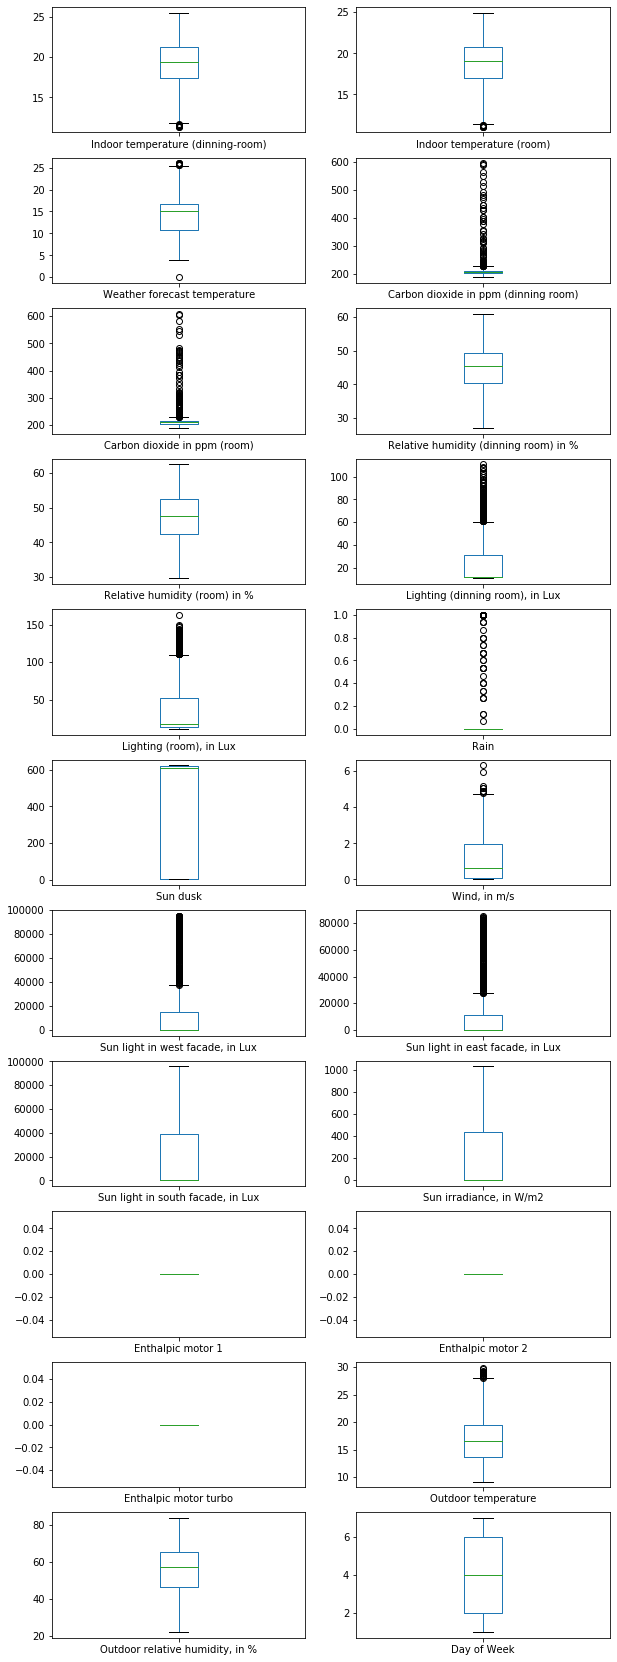

In [14]:
df.plot.box(subplots=True, sharex=False, layout=(11,2),figsize=(10,30))

In [15]:
df['Carbon dioxide in ppm (dinning room)'].max()

594.389

In [16]:
q0 = (df['Carbon dioxide in ppm (dinning room)'].quantile(0.10))
q1 = (df['Carbon dioxide in ppm (dinning room)'].quantile(0.90))
df['Carbon dioxide in ppm (dinning room)'] = np.where(df['Carbon dioxide in ppm (dinning room)'] <q0, q0,df['Carbon dioxide in ppm (dinning room)'])
df['Carbon dioxide in ppm (dinning room)'] = np.where(df['Carbon dioxide in ppm (dinning room)'] >q1, q1,df['Carbon dioxide in ppm (dinning room)'])

In [17]:
q0 = (df['Carbon dioxide in ppm (room)'].quantile(0.10))
q1 = (df['Carbon dioxide in ppm (room)'].quantile(0.90))
df['Carbon dioxide in ppm (room)'] = np.where(df['Carbon dioxide in ppm (room)'] <q0, q0,df['Carbon dioxide in ppm (room)'])
df['Carbon dioxide in ppm (room)'] = np.where(df['Carbon dioxide in ppm (room)'] >q1, q1,df['Carbon dioxide in ppm (room)'])

In [18]:
q0 = (df['Lighting (dinning room), in Lux'].quantile(0.10))
q1 = (df['Lighting (dinning room), in Lux'].quantile(0.90))
df['Lighting (dinning room), in Lux'] = np.where(df['Lighting (dinning room), in Lux'] <q0, q0,df['Lighting (dinning room), in Lux'])
df['Lighting (dinning room), in Lux'] = np.where(df['Lighting (dinning room), in Lux'] >q1, q1,df['Lighting (dinning room), in Lux'])

In [19]:
q0 = (df['Lighting (room), in Lux'].quantile(0.10))
q1 = (df['Lighting (room), in Lux'].quantile(0.90))
df['Lighting (room), in Lux'] = np.where(df['Lighting (room), in Lux'] <q0, q0,df['Lighting (room), in Lux'])
df['Lighting (room), in Lux'] = np.where(df['Lighting (room), in Lux'] >q1, q1,df['Lighting (room), in Lux'])

In [20]:
q0 = (df['Sun light in west facade, in Lux'].quantile(0.10))
q1 = (df['Sun light in west facade, in Lux'].quantile(0.86))
df['Sun light in west facade, in Lux'] = np.where(df['Sun light in west facade, in Lux'] <q0, q0,df['Sun light in west facade, in Lux'])
df['Sun light in west facade, in Lux'] = np.where(df['Sun light in west facade, in Lux'] >q1, q1,df['Sun light in west facade, in Lux'])

In [21]:
q0 = (df['Sun light in east facade, in Lux'].quantile(0.10))
q1 = (df['Sun light in east facade, in Lux'].quantile(0.86))
df['Sun light in east facade, in Lux'] = np.where(df['Sun light in east facade, in Lux'] <q0, q0,df['Sun light in east facade, in Lux'])
df['Sun light in east facade, in Lux'] = np.where(df['Sun light in east facade, in Lux'] >q1, q1,df['Sun light in east facade, in Lux'])

Indoor temperature (dinning-room)           AxesSubplot(0.125,0.826831;0.352273x0.053169)
Indoor temperature (room)                AxesSubplot(0.547727,0.826831;0.352273x0.053169)
Weather forecast temperature                AxesSubplot(0.125,0.763028;0.352273x0.053169)
Carbon dioxide in ppm (dinning room)     AxesSubplot(0.547727,0.763028;0.352273x0.053169)
Carbon dioxide in ppm (room)                AxesSubplot(0.125,0.699225;0.352273x0.053169)
Relative humidity (dinning room) in %    AxesSubplot(0.547727,0.699225;0.352273x0.053169)
Relative humidity (room) in %               AxesSubplot(0.125,0.635423;0.352273x0.053169)
Lighting (dinning room), in Lux          AxesSubplot(0.547727,0.635423;0.352273x0.053169)
Lighting (room), in Lux                      AxesSubplot(0.125,0.57162;0.352273x0.053169)
Rain                                      AxesSubplot(0.547727,0.57162;0.352273x0.053169)
Sun dusk                                    AxesSubplot(0.125,0.507817;0.352273x0.053169)
Wind, in m

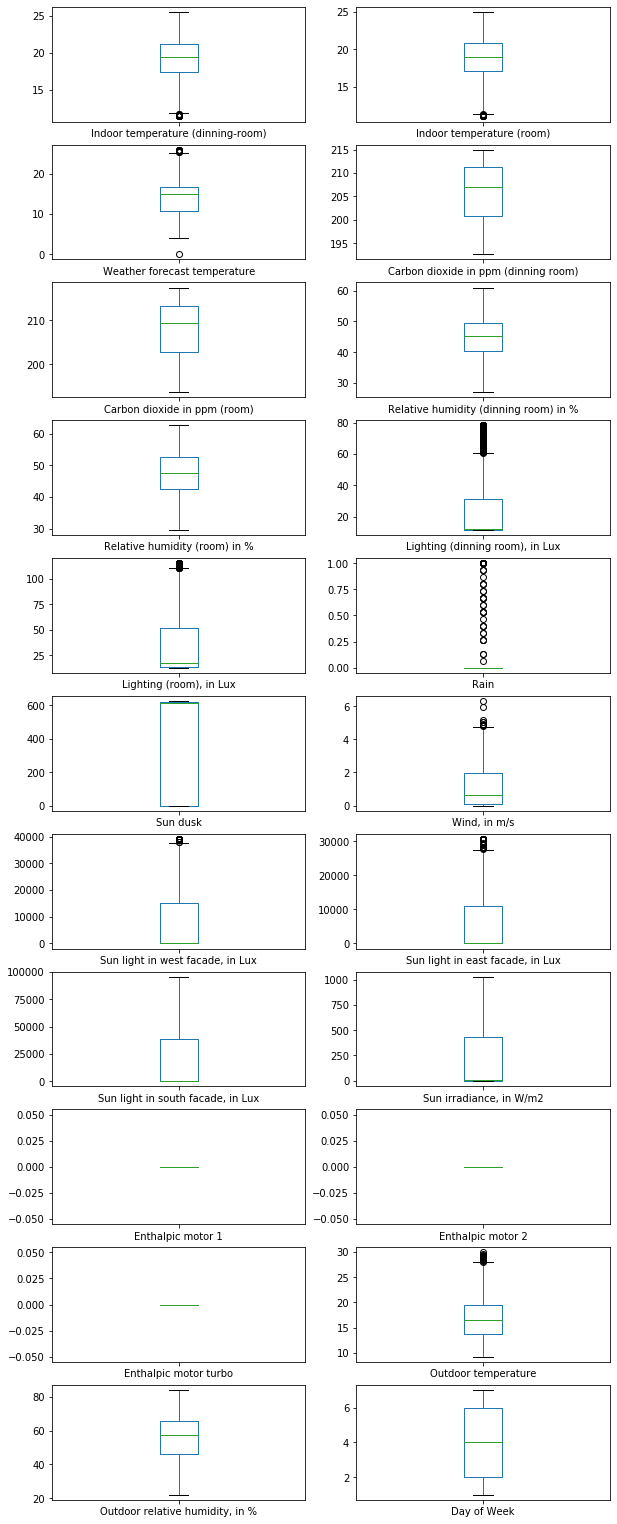

In [22]:
df.plot.box(subplots=True, sharex=False, layout=(12,2),figsize=(10,30))

<font size="3">A kiugr√≥ √©rt√©kek felkutat√°sa √©rdek√©ben minden attrib√∫tumra k√ºl√∂nb√∂z≈ë boxplotot hoztam l√©tre. Ennek seg√≠ts√©g√©vel vizu√°lisan k√∂nnyen felismerhet≈ëk azok az attrib√∫tumok, amelyek kiugr√≥ √©rt√©keket tartalmaznak. Ezekben az esetekben a 10 √©s 90%-os kvantilis hat√°rt h√∫ztam meg, √©s a t√∫l alacsony, vagy t√∫l magas √©rt√©keket ezeknek feleltettem meg. √çgy az adott rekord az adathalmaz szempontj√°b√≥l l√©nyeges inform√°ci√≥t, mint hogy az adott esetben magas vagy alacsony √©rt√©keket m√©rtek, megtartotta.</font>

In [23]:
df['Enthalpic motor 1'].unique()

array([0], dtype=int64)

In [24]:
df['Enthalpic motor 2'].unique()

array([0], dtype=int64)

In [25]:
df['Enthalpic motor turbo'].unique()

array([0], dtype=int64)

In [26]:
df = df.drop(['Enthalpic motor 1','Enthalpic motor 2', 'Enthalpic motor turbo'],axis=1)

<font size="3">Az adathalmazban szerepelt h√°rom olyan attrub√∫tum (Enthalpic motor 1, Enthalpic motor 2, Enhtalpic motor turbo), amelyek √©rt√©kei minden egyes rekord eset√©n null√°k voltak, √≠gy nem hordoztak l√©nyeges inform√°ci√≥t a vizsg√°lat szempontj√°b√≥l. Ezeket az attrib√∫tumokat elt√°vol√≠tottam.</font>

In [27]:
df.head(10)

Date   Time  Indoor temperature (dinning-room)  \
0  13/03/2012  11:45                            18.1875   
1  13/03/2012  12:00                            18.4633   
2  13/03/2012  12:15                            18.7673   
3  13/03/2012  12:30                            19.0727   
4  13/03/2012  12:45                            19.3721   
5  13/03/2012  13:00                            19.6407   
6  13/03/2012  13:15                            19.9120   
7  13/03/2012  13:30                            20.1640   
8  13/03/2012  13:45                            20.4120   
9  13/03/2012  14:00                            20.6400   

   Indoor temperature (room)  Weather forecast temperature  \
0                    17.8275                           0.0   
1                    18.1207                           6.8   
2                    18.4367                          17.0   
3                    18.7513                          18.0   
4                    19.0414                          20.0   
5                    19.2773                          20.0   
6                    19.5367                          20.0   
7                    19.7307                          20.0   
8                    19.9693                          20.0   
9                    20.1407                          20.0   

   Carbon dioxide in ppm (dinning room)  Carbon dioxide in ppm (room)  \
0                              214.9484                      217.3837   
1                              214.9484                      217.3837   
2                              214.9484                      217.3837   
3                              214.9484                      217.0450   
4                              214.9484                      216.0800   
5                              214.9484                      216.0110   
6                              214.9484                      215.8290   
7                              214.9484                      215.2960   
8                              214.9484                      214.5490   
9                              214.9484                      213.9090   

   Relative humidity (dinning room) in %  Relative humidity (room) in %  \
0                                39.9125                        42.4150   
1                                39.9267                        42.2453   
2                                39.7720                        42.2267   
3                                39.7760                        42.0987   
4                                39.7757                        42.0686   
5                                39.8107                        42.0347   
6                                39.8613                        41.9947   
7                                39.8240                        41.9947   
8                                39.9587                        42.1253   
9                                39.9400                        42.0427   

   Lighting (dinning room), in Lux  ...  Rain  Sun dusk  Wind, in m/s  \
0                         78.22561  ...   0.0   623.360       1.42625   
1                         78.22561  ...   0.0   623.211       1.59200   
2                         78.22561  ...   0.0   622.656       1.89133   
3                         78.22561  ...   0.0   622.571       1.82800   
4                         78.22561  ...   0.0   622.400       2.36071   
5                         78.22561  ...   0.0   622.400       2.06333   
6                         78.22561  ...   0.0   622.400       2.23067   
7                         78.22561  ...   0.0   621.803       1.92400   
8                         78.22561  ...   0.0   620.651       2.51067   
9                         78.22561  ...   0.0   620.309       2.65333   

   Sun light in west facade, in Lux  Sun light in east facade, in Lux  \
0                          9690.240                          12604.20   
1                         11022.000                          10787.20   
2                      

*** 

### K√ºl√∂nb√∂z≈ë vizualiz√°ci√≥s eszk√∂z√∂k haszn√°lata az adathalmaz, illetve az attrib√∫tumok k√∂z√∂tt fenn√°ll√≥ kapcsolatok felt√°r√°s√°ra, k√©t vagy t√∂bb attrib√∫tum egy√ºttes vizsg√°lata alkalmas plotok felhaszn√°l√°s√°val √©s a kapott eredm√©nyek √©rtelmez√©se.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022145277B48>,
      dtype=object)

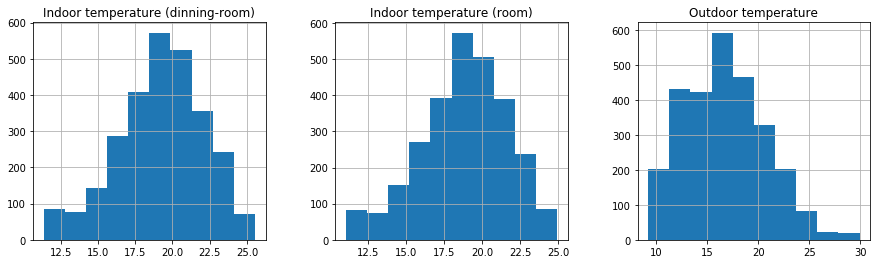

In [28]:
features = ['Indoor temperature (dinning-room)','Indoor temperature (room)', 'Outdoor temperature']
df[features].hist(layout=(1,3),figsize=(15,4))

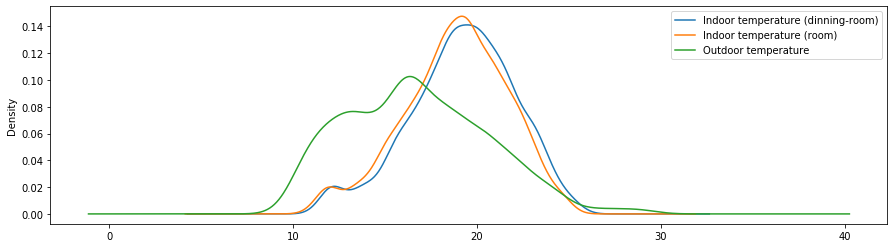

In [29]:
df[features].plot.density(subplots=False,figsize=(15,4))

<font size="3">A ___k√ºls≈ë √©s bels≈ë helysz√≠nekre vonatkoz√≥ h≈ëm√©rs√©kleti adatok___at hisztogram seg√≠ts√©g√©vel √°br√°zoltam. Ebb≈ël l√°tszik, hogy a k√©t bels≈ë t√©rben szinte megegyeznek a m√©rt adatok √©s a 18 fok k√∂r√ºli h≈ëm√©rs√©klet volt a leggyakoribb, m√≠g a k√ºls≈ë h≈ëm√©rs√©klet eset√©ben a kisebb √©rt√©kek a gyakoribbak. Itt a 16 fok k√∂r√ºli eredm√©nyek fordultak el≈ë legt√∂bbsz√∂r. A h≈ëm√©rs√©kleti adatokhoz tartoz√≥  s≈±r≈±s√©gf√ºggv√©ny eloszl√°s√°b√≥l is ezek az inform√°ci√≥k olvashat√≥k le. </font>

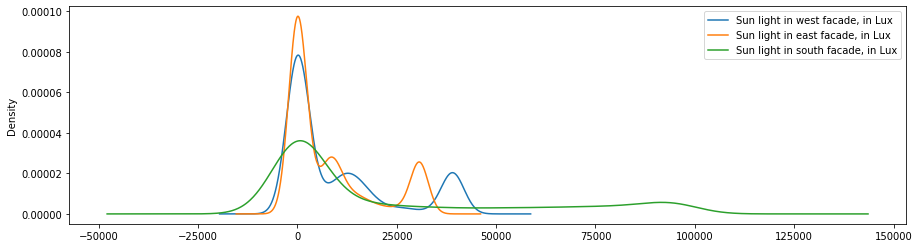

In [30]:
features = ['Sun light in west facade, in Lux','Sun light in east facade, in Lux','Sun light in south facade, in Lux']
df[features].plot.density(subplots=False,figsize=(15,4))

<font size="3">Az egyes ___√©gt√°jak fel≈ëli homlokzatra es≈ë napf√©nymennyis√©g___ s≈±r≈±s√©gf√ºggv√©ny√©b≈ël leolvashat√≥, hogy mind a 3 attrib√∫tum eset√©ben a null√°s √©rt√©kek voltak a leggyakoribbak. A nyugati √©s keleti oldalra n√©z≈ë homlokzatra es≈ë f√©nymennyis√©g k√∂zel azonos, a d√©li oldalra azonban sokkal kevesebb f√©ny esik.</font>

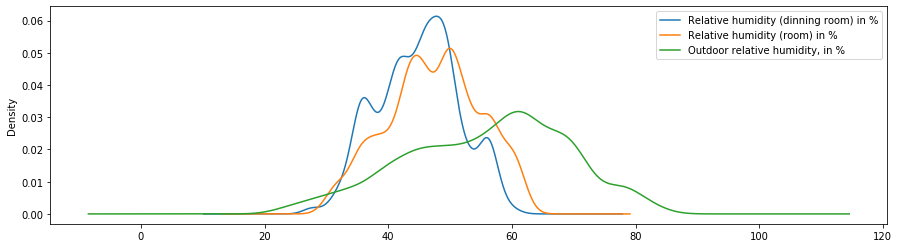

In [31]:
features = ['Relative humidity (dinning room) in %','Relative humidity (room) in %','Outdoor relative humidity, in %']
df[features].plot.density(subplots=False,figsize=(15,4))

<font size="3">A ___relat√≠v p√°ratartalom___ra vonatkoz√≥ attrib√∫tumok s≈±r≈±s√©gf√ºggv√©ny√©b≈ël szint√©n az olvashat√≥ le, hogy a k√©t bels≈ë helyis√©gre vonatkoz√≥ adatok k√∂zelebb esnek egym√°shoz, mint a kintr≈ël vett adatok, ugyanakkor a bels≈ë terekn√©l is nagyobb elt√©r√©sek figyelhet≈ëk meg, mint a h≈ëm√©rs√©klet eset√©ben. Kint a 60% k√∂r√ºli p√°ratartalom volt a leggyakoribb, bent pedig 44% k√∂r√ºl mozgott ez az √©rt√©k.</font>

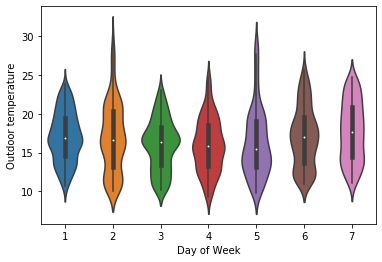

In [32]:
sns.violinplot(data=df,y='Outdoor temperature',x='Day of Week')

<font size="3">Violinplot seg√≠ts√©g√©vel megfigyelhet≈ë, hogy a ___kint m√©rt h≈ëm√©rs√©klet___ek a h√©t k√ºl√∂nb√∂z≈ë ___nap___jain hasonl√≥ eloszl√°st k√∂vetnek, ugyanakkor √°tlagosan kedden √©s p√©nteken volt a legmelegebb.</font>

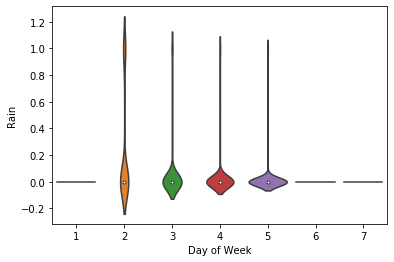

In [33]:
sns.violinplot(data=df,y='Rain',x='Day of Week')

<font size="3">Az ___es≈ë___re vonatkoz√≥ adatokat hasonl√≥an, a ___nap___okkal szeml√©ltetve megfigyelhet≈ë, hogy az adatb√°zisban szerepl≈ë √©rt√©kek alapj√°n  h√©tf≈ën, szombaton √©s vas√°rnap egyszer sem esett az es≈ë.</font>

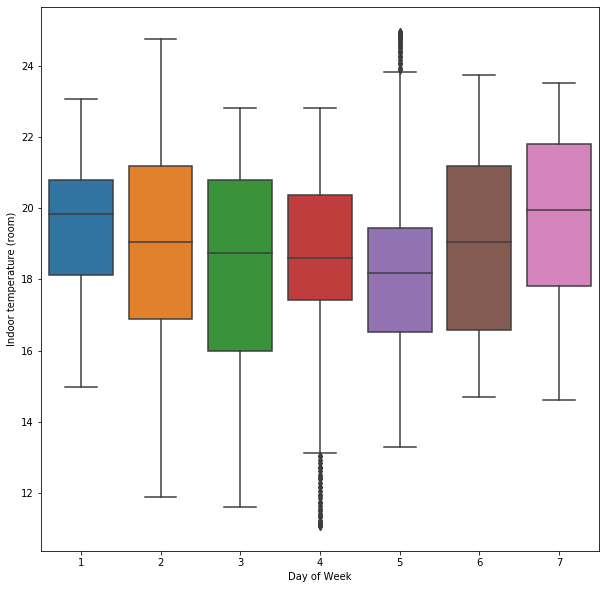

In [34]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(data=df,x='Day of Week', y='Indoor temperature (room)',ax=ax)

<font size="3">Boxplot seg√≠ts√©g√©vel megvizsg√°ltam, hogy a ___szob√°ban m√©rt h≈ëm√©rs√©klet___re hat√°ssal van-e az adott h√©t ___nap___ja, p√©ld√°ul mert nincs otthon senki, √≠gy nincs sz√ºks√©g f≈±t√©sre vagy l√©gkondicion√°l√≥ra sem. A diagramm alapj√°n arra a k√∂vetkeztet√©sre jutottam, hogy h√©tv√©g√©n t√∂bbnyire kellemesebb id≈ë volt jellemz≈ë, de nagy elt√©r√©sek nincsenek a napok √©s a h≈ëm√©rs√©klet tekintet√©ben.</font>

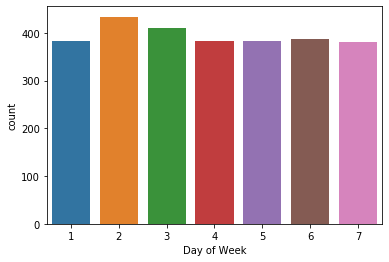

In [35]:
sns.countplot(data=df, x='Day of Week')

<font size="3">Countplot seg√≠ts√©g√©vel megvizsg√°ltam, hogy a m√©r√©sek hogyan oszlanak meg a h√©t napjai k√∂z√∂tt. A diagram alapj√°n megfigyelhet≈ë, hogy k√∂zel azonos mennyis√©g≈± rekord sz√°rmazik minden napr√≥l, de keddi m√©r√©sb≈ël van a legt√∂bb.</font>

In [36]:
corr = df.corr()
corr

Indoor temperature (dinning-room)  \
Indoor temperature (dinning-room)                               1.000000   
Indoor temperature (room)                                       0.990941   
Weather forecast temperature                                    0.706777   
Carbon dioxide in ppm (dinning room)                           -0.065614   
Carbon dioxide in ppm (room)                                   -0.035257   
Relative humidity (dinning room) in %                          -0.273088   
Relative humidity (room) in %                                  -0.412014   
Lighting (dinning room), in Lux                                 0.035044   
Lighting (room), in Lux                                        -0.028680   
Rain                                                           -0.270243   
Sun dusk                                                        0.046683   
Wind, in m/s                                                    0.199828   
Sun light in west facade, in Lux                                0.295430   
Sun light in east facade, in Lux                               -0.210779   
Sun light in south facade, in Lux                              -0.039083   
Sun irradiance, in W/m2                                         0.088068   
Outdoor temperature                                             0.855991   
Outdoor relative humidity, in %                                -0.560467   
Day of Week                                                     0.033606   

                                       Indoor temperature (room)  \
Indoor temperature (dinning-room)                       0.990941   
Indoor temperature (room)                               1.000000   
Weather forecast temperature                            0.720877   
Carbon dioxide in ppm (dinning room)                   -0.051238   
Carbon dioxide in ppm (room)                           -0.021530   
Relative humidity (dinning room) in %                  -0.275193   
Relative humidity (room) in %                          -0.417901   
Lighting (dinning room), in Lux                         0.074588   
Lighting (room), in Lux                                 0.012154   
Rain                                                   -0.262621   
Sun dusk                                                0.068897   
Wind, in m/s                                            0.220667   
Sun light in west facade, in Lux                        0.306847   
Sun light in east facade, in Lux                       -0.187323   
Sun light in south facade, in Lux                       0.000072   
Sun irradiance, in W/m2                                 0.123390   
Outdoor temperature                                     0.863417   
Outdoor relative humidity, in %                        -0.549681   
Day of Week                                             0.016382   

                                       Weather forecast temperature  \
Indoor temperature (dinning-room)                          0.706777   
Indoor temperature (room)                                  0.720877   
Weather forecast temperature                               1.000000   
Carbon dioxide in ppm (dinning room)                      -0.079133   
Carbon dioxide in ppm (room)                              -0.122979   
Relative humidity (dinning room) in %                     -0.196824   
Relative humidity (room) in %                             -0.298878   
Lighting (dinning room), in Lux                            0.428661   
Lighting (room), in Lux                                    0.386113   
Rain                                                      -0.093927   
Sun dusk                                                   0.388211   
Wind, in m/s                                               0.536247   
Sun light in west facade, in Lux                           0.510452   
Sun light in east facade, in Lux                           0.101718   
Sun light in south facade, in Lux                          0.354029   
Sun irradiance, in W/

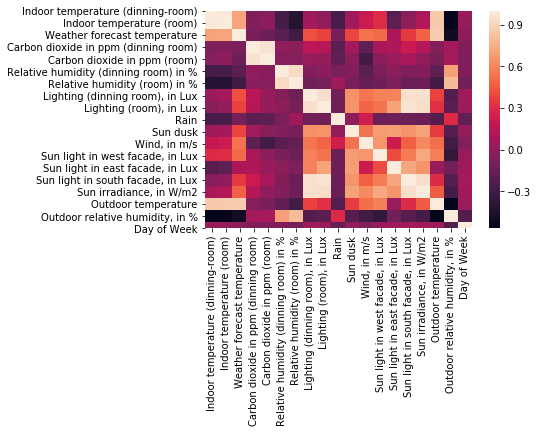

In [37]:
sns.heatmap(corr)

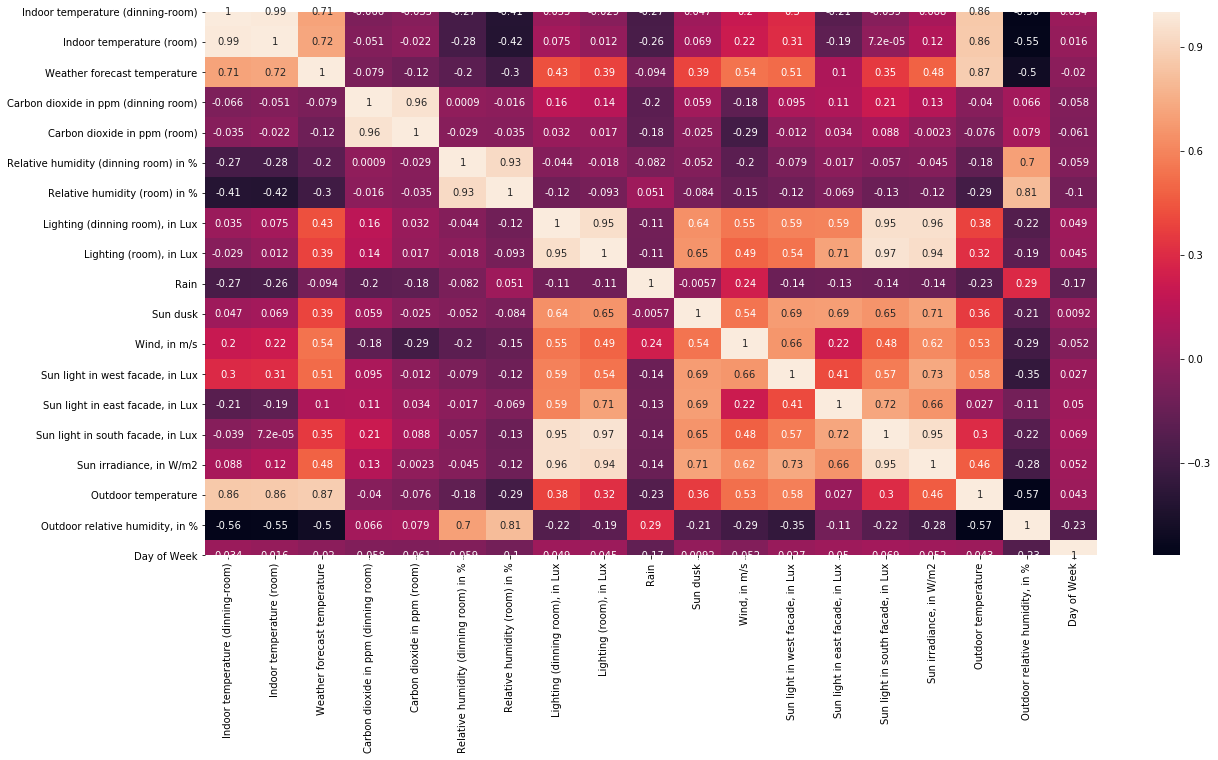

In [103]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr,annot=True,ax=ax)

<font size="3">Az adathalmaz attrib√∫tumai k√∂z√∂tt fenn√°ll√≥ kapcsolatot egy ___korrel√°ci√≥s t√°bl√°zat___ seg√≠ts√©g√©vel szeml√©ltettem. A k√∂nnyebb √°tl√°that√≥s√°g √©rdek√©ben a kapott eredm√©nyt egy ___heatmap___pal is megjelen√≠tettem, majd √∫gy is, hogy a heatmap ne csak a sz√≠nekkel hanem az egyes cell√°khoz tartoz√≥ √©rt√©kek megjelen√≠t√©s√©vel is seg√≠tse a k√∂nnyebb √©rtelmez√©st. 
</font>

<font size="3">Ez alapj√°n megfigyelhet≈ë, hogy mely attrib√∫tumok azok, amelyek szorosabb kapcsolatban √°llnak egym√°ssal. Pozit√≠v kapcsolat eset√©n a cell√°k sz√≠ne egyre vil√°gosabb, a benn√ºk szerepl≈ë √©rt√©k pedig egyre k√∂zelebb esik az 1-hez. Negat√≠v kapcsolat eset√©n a cell√°k sz√≠ne egyre s√∂t√©tebb, √©s az √©rt√©kek egyre k√∂zelebb esnek a -1-hez. Azokban az esetekben, ahol a k√©t attrib√∫tum k√∂z√∂tt nincsen er≈ës korrel√°ci√≥s kapcsolat, az √©rt√©kek 0 k√∂r√ºl mozognak. Ez alapj√°n megfigyelhet≈ë p√©ld√°ul, hogy a szoba h≈ëm√©rs√©klete szoros kapcsolatban van az √©tkez≈ë h≈ëm√©rs√©klet√©vel, a kinti h≈ëm√©rs√©klettel √©s az el≈ëre jelz√©sekkel (er≈ës pozit√≠v korrel√°ci√≥), valamint a szob√°ban m√©rt √©s a k√ºls≈ë relat√≠v p√°ratartalommal (er≈ës negat√≠v korrel√°ci√≥). </font>


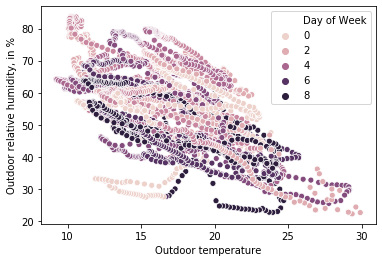

In [39]:
sns.scatterplot(data=df,x='Outdoor temperature',y='Outdoor relative humidity, in %', hue='Day of Week')

<font size="3">Az attrib√∫tumok k√∂z√∂tt fenn√°ll√≥ kapcsolatok vizsg√°lat√°ra ___pontdiagram___okat alkalmaztam, amelyek alapj√°n arra a k√∂vetkeztet√©sre jutottam, hogy t√∂bbnyire line√°ris kapcsolat figyelhet≈ë meg az egyes oszlopok √©rt√©kei k√∂z√∂tt. P√©ld√°ul min√©l magasabb a kinti relat√≠v p√°ratartalom, ann√°l alacsonyabb a h≈ëm√©rs√©klet.</font>

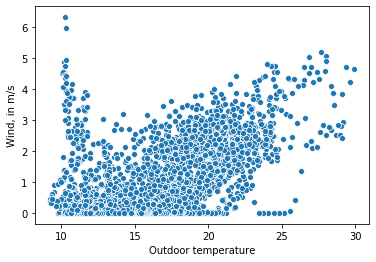

In [40]:
sns.scatterplot(data=df,x='Outdoor temperature',y='Wind, in m/s')

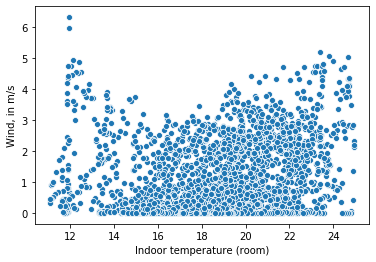

In [41]:
sns.scatterplot(data=df,x='Indoor temperature (room)',y='Wind, in m/s')

<font size="3">Ugyanakkor, a h≈ëm√©rs√©kletek adatai √©s a sz√©l er≈ëss√©ge k√∂z√∂tt nincsen egy√©rtelm≈± kapcsolat.</font>

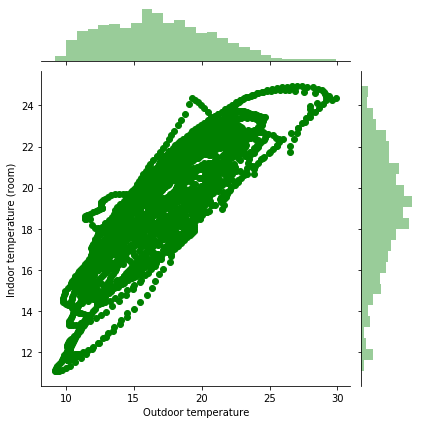

In [42]:
sns.jointplot(data=df,x='Outdoor temperature',y='Indoor temperature (room)', color='g')

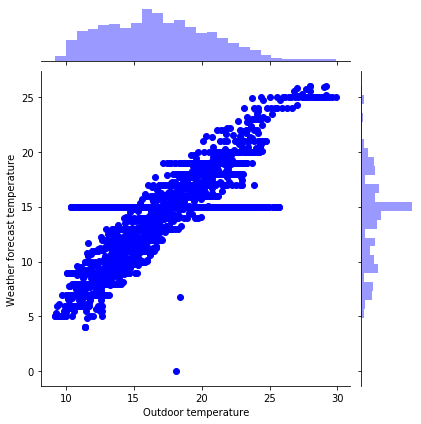

In [43]:
sns.jointplot(data=df,x='Outdoor temperature',y='Weather forecast temperature', color='b')

<font size="3">___Joinplot___ seg√≠ts√©g√©vel megfigyelhet≈ë, hogy a kinti √©s benti h≈ëm√©rs√©kleti adatok k√∂z√∂tt line√°ris kapcsolat √°ll fent, ugyanakkor kint √°tlagosan alacsonyabb h≈ëm√©rs√©kleti √©rt√©kek voltak gyakoribbak a bent m√©rt √©rt√©kekhez k√©pest.  </font>

<font size="3">Hasonl√≥an megjelen√≠tve az el≈ërejelz√©sek adatait a kinti h≈ëm√©rs√©kleti adatokkal, szint√©n line√°ris kapcsolat figyelhet≈ë meg, ugyanakkor itt t√∂bb kiugr√≥ √©rt√©kkel tal√°lkozhatunk. Az el≈ërejelz√©sek gyakran 15 ¬∞C-os h≈ëm√©rs√©kletet adtak, azonban a val√≥di h≈ëm√©rs√©klet ett≈ël t√∂bb esetben elt√©rt.</font>

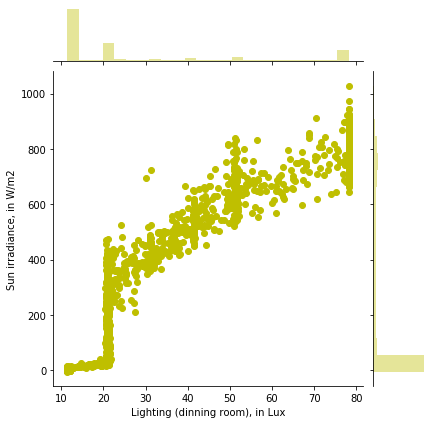

In [44]:
sns.jointplot(data=df,x='Lighting (dinning room), in Lux',y='Sun irradiance, in W/m2', color='y') 

<font size="3">Az √©tkez≈ë vil√°goss√°g√°ra √©s a nap er≈ëss√©g√©re vonatkoz√≥ adatokat hasonl√≥ m√≥don, joinplot seg√≠ts√©g√©vel szeml√©ltetve er≈ës line√°ris kapcsolat figyelhet≈ë meg. Az √©tkez≈ë megvil√°g√≠totts√°g√°nak adatai 20 √©s 80 Lux-n√°l  a kiugr√≥ √©rt√©kek kezel√©se miatt s≈±r≈±bbek.</font>

<font size="3">Alkalmas ___pairplot___ok seg√≠ts√©g√©vel k√ºl√∂n-k√ºl√∂n is megvizsg√°ltam az egyes attrib√∫tumok k√∂z√∂tti kapcsolatokat. Az eredm√©nyek alapj√°n megfigyelhet≈ë, hogy t√∂bbnyire line√°ris kapcsolat √°ll fent az oszlopok √©rt√©kei k√∂z√∂tt, de vannak olyan esetek, amikor az adatok teljesen sz√©tsz√≥rva jelennek meg. Ekkor nincsen kapcsolat az attrib√∫tumok k√∂z√∂tt. Ezek az √©rt√©kek a korrel√°ci√≥s t√°bl√°zatb√≥l is kiolvashat√≥k.</font>

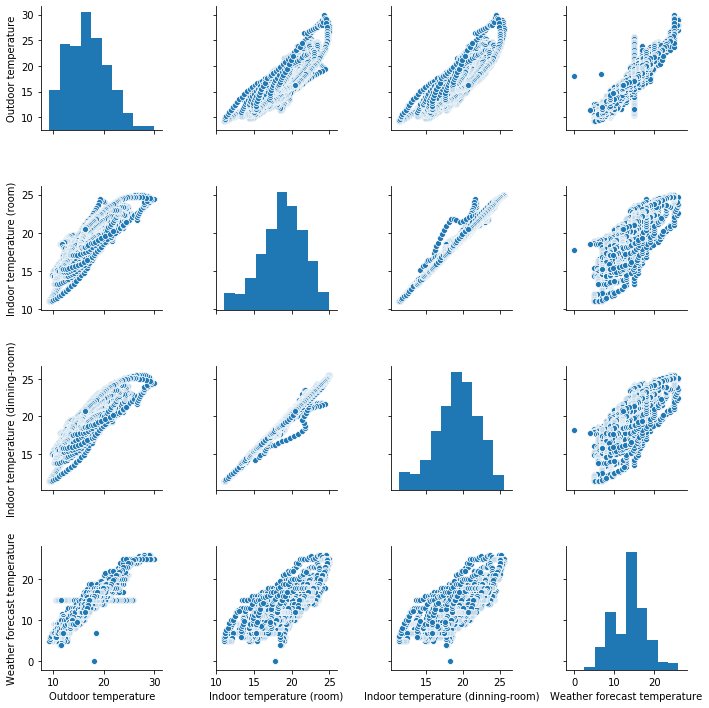

In [45]:
features = ['Outdoor temperature', 'Indoor temperature (room)', 'Indoor temperature (dinning-room)','Weather forecast temperature']
sns.pairplot(df.loc[:,features])

In [46]:
# sns.pairplot(df)

 ***

### Klaszterez√©sre haszn√°lhat√≥ algoritmus kiv√°laszt√°sa, bemutat√°sa, illetve annak az adathalmazra t√∂rt√©n≈ë alkalmaz√°sa, a kapott eredm√©nyek √©rtelmez√©se.

<font size="3">Klaszterez√©shez a ___k-k√∂z√©p m√≥dszer___t v√°lasztottam, amely egy protot√≠pus-alap√∫, feloszt√≥ klaszterez≈ë m√≥dszer. Megpr√≥b√°lja megkeresni az √°ltalunk megadott sz√°m√∫ (k) klasztert, amelyeket a k√∂z√©ppontjaik k√©pviselnek.</font>

<font size="3">A m√≥dszer l√©nyeg√©ben egy k√∂z√©ppontot v√°laszt ki protot√≠pusnak, amely gyakran pontok egy csoportj√°nak az √°tlaga. Az algoritmus √°ltal√°ban egyszer≈± hasonl√≥s√°gi m√©rt√©keket haszn√°l, mivel √∫jra meg √∫jra kisz√°molja a pontok √©s a k√∂z√©ppontok k√∂z√∂tti hasonl√≥s√°got. Jellemz≈ëen folytonos, n-dimenzi√≥s t√©rben elhelyezked≈ë pontokra alkalmazhat√≥.  </font>

<font size="3">Els≈ë l√©p√©sk√©nt a ___k-k√∂ny√∂k m√≥dszer___ seg√≠ts√©g√©vel meghat√°roztam a klaszterek ide√°lis sz√°m√°t. A megfelel≈ë klasztersz√°m az a pont lesz, ami a g√∂rbe "k√∂ny√∂k√©n√©l" helyezkedik el.</font> 

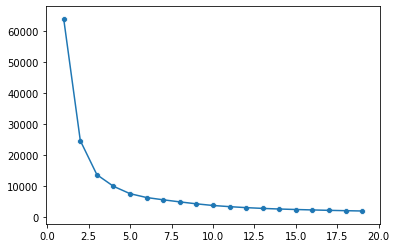

In [47]:
err = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Indoor temperature (room)','Outdoor temperature']]);
    err.append([kmeans.n_clusters, kmeans.inertia_])

err = np.asarray(err)
sns.lineplot(err[:,0], err[:,1])
sns.scatterplot(err[:,0], err[:,1]);

<font size="3">Ezt k√∂vet≈ëen fel√©p√≠tettem a klaszterez≈ë algoritmust, amely az ___Indoor temperature (room)___ √©s az ___Outdoor temperature___ attrib√∫tumokat felhaszn√°lva hajt v√©gre csoportos√≠t√°st. Az attrib√∫tumok k√∂z√∂tti line√°ris kapcsolat a kor√°bban l√©trehozott pairplotok seg√≠ts√©g√©vel megfigyelhet≈ë, √≠gy a klaszterez√©s szempontj√°b√≥l megfelel≈ë attrib√∫tumnak min≈ës√ºlnek.  </font>

In [48]:
err = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Indoor temperature (room)','Outdoor temperature']])
    err.append([kmeans.n_clusters, kmeans.inertia_])

err = np.asarray(err)
print(err)

[[1.00000000e+00 6.37120865e+04]
 [2.00000000e+00 2.45522509e+04]
 [3.00000000e+00 1.35706664e+04]
 [4.00000000e+00 9.84126849e+03]
 [5.00000000e+00 7.45964347e+03]
 [6.00000000e+00 6.21628566e+03]
 [7.00000000e+00 5.51612362e+03]
 [8.00000000e+00 4.81110147e+03]
 [9.00000000e+00 4.18990448e+03]]


In [49]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[['Indoor temperature (room)','Outdoor temperature']]);
kmeans.cluster_centers_

array([[21.95002   , 21.79933972],
       [19.18559537, 16.77660207],
       [15.60348501, 12.37826791]])

<font size="3">A klaszter k√∂z√©ppontok koordin√°t√°i.</font>

In [50]:
def plot_result(kmeans):
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df['Indoor temperature (room)'], y=df['Outdoor temperature'], hue=kmeans.labels_, palette="Set1", marker='+');
    sns.scatterplot(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], marker='o', s=100, c=['black']);

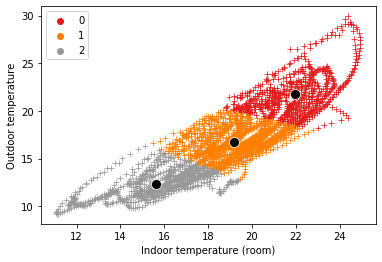

In [51]:
plot_result(kmeans)

In [52]:
kmeans.predict([[17,15],[22,19]])

array([1, 0])

<font size="3">A plotol√°s seg√≠ts√©g√©vel megfigyelhet≈ë a klaszterez√©s eredm√©nye. A k√ºl√∂nb√∂z≈ë sz√≠nek jel√∂lik a k√ºl√∂nb√∂z≈ë klaszter csoportokat. A param√©tereknek megfelel≈ëen (k=3) 3 darab klasztert k√ºl√∂nb√∂ztethet√ºnk meg egym√°st√≥l. </font>

<font size="3">Predikt√°l√°s seg√≠ts√©g√©vel megadhatunk k√ºl√∂nb√∂z≈ë pontokat, amelyekr≈ël visszakapjuk, hogy a klaszterez√©s folyam√°n mely csoportokba ker√ºltek beoszt√°sra. A fent szerepl≈ë utas√≠t√°sb√≥l megfigyelhet≈ë, hogy a (17,15) pont a 2. m√≠g a (22,19) pont az 1. csoportba ker√ºlt beoszt√°sra.</font>

 ***

### Line√°ris regresszi√≥ alkalmaz√°sa folytonos attrib√∫tum eset√©n, az eredm√©nyek √©rtelmez√©se, illetve azok felhaszn√°l√°sa

<font size="3">A kor√°bban l√©trehozott pairplotokat √©s scatterplotokat megvizsg√°lva v√°lasztottam ki k√©t olyan attrib√∫tumot, amelyek k√∂z√∂tt er≈ës line√°ris kapcsolat figyelhet≈ë meg. Ezek alapj√°n a ___Lighting (dinning room), in Lux___ valamint a ___Sun irradiance, in W/m2___ oszlopokat felhaszn√°lva k√©sz√≠tettem line√°ris regresszi√≥t. </font>

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
x = df[['Lighting (dinning room), in Lux']].to_numpy()
y = df['Sun irradiance, in W/m2'].to_numpy()

In [55]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
reg.coef_

array([12.80791247])

In [57]:
reg.intercept_

-121.95884226082265

<font size="3">A line√°ris regresszi√≥ eredm√©nyek√©nt a $\theta$ eggy√ºthat√≥it kapjuk meg:
<br><br>
<center>$h(x) = \theta_0 + \theta_1 x_1  $</center>

ahol h(x) a pontokra legink√°bb illeszked≈ë egyenes egyenlete.
</font>

<font size="3">
Ebben az esetben

<center>$\theta_0$ = -121.9588<center>
    
<center>$\theta_1$ = 12.8079<center>
</font>

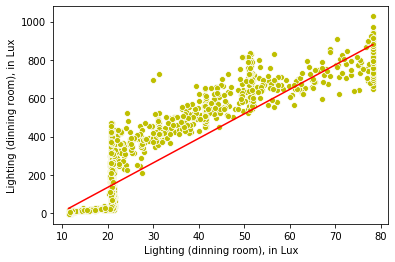

In [58]:
theta0 = reg.intercept_
theta1 = reg.coef_[0]
h = theta0 + theta1 * df['Lighting (dinning room), in Lux']
sns.scatterplot(df['Lighting (dinning room), in Lux'],df['Sun irradiance, in W/m2'],color='y')
sns.lineplot(df['Lighting (dinning room), in Lux'],h,color='r')

In [59]:
m = y.shape[0]
error = np.sum((h-y)**2)/(2*m)
error

3852.0258003200806

<font size="3">Az error kisz√°m√≠t√°s√°nak seg√≠ts√©g√©vel a line√°ris regresszi√≥ pontatlans√°g√°t figyelhetj√ºk meg. Jelen esetben ez el√©g nagy, √≠gy √©rdemes lehet pontosabb illeszt√©st alkalmazni.</font>

In [60]:
reg.predict([[40]])

array([390.35765634])

<font size="3">A regresszi√≥t felhaszn√°lva lehet≈ës√©g√ºnk van pontok predikt√°l√°s√°ra. Ebben az esetben a megadott x √©rt√©khez tartoz√≥ k√∂zel√≠tett y √©rt√©ket kapjuk vissza, az illesztett egyenest felhaszn√°lva. Ezek alapj√°n p√©ld√°ul az x=40-hez predikt√°lt y √©rt√©k 390.3577.</font>

<font size="3">Az el≈ëz≈ë megold√°s nagy hib√°ja miatt, egy pontosabb modellt alkalmazva is megpr√≥b√°ltam line√°ris regresszi√≥t l√©trehozni. A modell a k√∂vetkez≈ë:
 <center>$h(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_1^2 + \theta_3 x_1^3$<center>
     </font>

In [61]:
df1 = df

df1['x2'] = df1['Lighting (dinning room), in Lux']**2
df1['x3'] = df1['Lighting (dinning room), in Lux']**3

In [62]:
X = df1[['Lighting (dinning room), in Lux','x2','x3']].to_numpy()
y = df1['Sun irradiance, in W/m2'].to_numpy()

In [63]:
reg2 = LinearRegression()
reg2.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
reg2.coef_

array([ 2.61091144e+01, -1.41558839e-01, -2.03557956e-04])

In [65]:
reg2.intercept_

-289.5418429088526

<font size="3">
Ebben az esetben
    <br><br>
<center>$\theta_0$ = -289.5484<center>   
<center>$\theta_1$ = 2.6109<center>
<center>$\theta_2$ = -1.4156<center>
<center>$\theta_3$ = -2.0356<center>
</font>

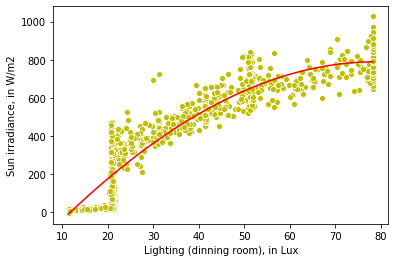

In [66]:
theta0 = reg2.intercept_
theta1 = reg2.coef_[0]
theta2 = reg2.coef_[1]
theta3 = reg2.coef_[2]
h = theta0 + theta1 * df1['Lighting (dinning room), in Lux'] + theta2 * df1['x2'] + theta3 * df1['x3']
sns.scatterplot(df1['Lighting (dinning room), in Lux'],df['Sun irradiance, in W/m2'],color='y')
sns.lineplot(df1['Lighting (dinning room), in Lux'],h,color='r')

In [67]:
m = y.shape[0]
error2 = np.sum((h-y)**2)/(2*m)
error2

1948.5141017002832

In [68]:
reg2.predict([[40,40**2,40**3]])

array([515.30088056])

<font size="3">Ez alapj√°n, az x=40 ponthoz predikt√°lt y √©rt√©k 515.3, ami sokkal k√∂zelebb √°ll az adatokhoz, mint az el≈ëz≈ë esetben.</font>

In [69]:
error/error2

1.9769042456294177

<font size="3">A m√°sodik modell 1.98-szor pontosabb eredm√©nyt biztos√≠t.</font>

 ***

### Logisztikus regresszi√≥ alkalmaz√°sa diszkr√©t attrib√∫tum eset√©n, az eredm√©nyek √©rtelmez√©se, illetve azok felhaszn√°l√°sa

<font size="3">Mivel az adathalmaz nem rendelkezett diszkr√©t √©rt√©keket tartalmaz√≥ attrib√∫tummal, √≠gy bevezettem egy √∫j oszlopot, amelynek elemeit az ___Outdoor temperature___ oszlophoz tartoz√≥ adatokb√≥l sz√°rmaztattam.</font>

<font size="3">A kor√°bban l√©trehozott korrel√°ci√≥s t√°bl√°zatokat, pairplotokat √©s scatterplotokat megvizsg√°lva v√°lasztottam ki k√©t olyan attrib√∫tumot, amelyek er≈ës korrel√°ci√≥s kapcsolatban √°llnak az Outdoor temperature oszlop elemeivel. Ezek alapj√°n a logisztikus regresszi√≥hoz haszn√°lt attrib√∫tumok a k√∂vetkez≈ëk: ___Indoor temperature (dinning-room)___, ___Weather forecast temperature___, ___t___ (a sz√°m√≠tott oszlop).</font>

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
df['t'] = df.apply(lambda row: 'cool' if row['Outdoor temperature'] < 15 else 'pleasing' if row['Outdoor temperature'] < 22 else 'warm', axis=1)

In [72]:
df.head()

Date   Time  Indoor temperature (dinning-room)  \
0  13/03/2012  11:45                            18.1875   
1  13/03/2012  12:00                            18.4633   
2  13/03/2012  12:15                            18.7673   
3  13/03/2012  12:30                            19.0727   
4  13/03/2012  12:45                            19.3721   

   Indoor temperature (room)  Weather forecast temperature  \
0                    17.8275                           0.0   
1                    18.1207                           6.8   
2                    18.4367                          17.0   
3                    18.7513                          18.0   
4                    19.0414                          20.0   

   Carbon dioxide in ppm (dinning room)  Carbon dioxide in ppm (room)  \
0                              214.9484                      217.3837   
1                              214.9484                      217.3837   
2                              214.9484                      217.3837   
3                              214.9484                      217.0450   
4                              214.9484                      216.0800   

   Relative humidity (dinning room) in %  Relative humidity (room) in %  \
0                                39.9125                        42.4150   
1                                39.9267                        42.2453   
2                                39.7720                        42.2267   
3                                39.7760                        42.0987   
4                                39.7757                        42.0686   

   Lighting (dinning room), in Lux  ...  Sun light in west facade, in Lux  \
0                         78.22561  ...                           9690.24   
1                         78.22561  ...                          11022.00   
2                         78.22561  ...                          13960.50   
3                         78.22561  ...                          18511.20   
4                         78.22561  ...                          26349.00   

   Sun light in east facade, in Lux  Sun light in south facade, in Lux  \
0                          12604.20                            95436.8   
1                          10787.20                            95436.8   
2                           9669.63                            95398.6   
3                           9648.13                            95360.3   
4                           9208.32                            95354.9   

   Sun irradiance, in W/m2  Outdoor temperature  \
0                  758.880              18.1150   
1                  762.069              18.4147   
2                  766.251              18.8533   
3                  766.037              19.2907   
4                  762.743              19.7400   

   Outdoor relative humidity, in %  Day of Week          x2             x3  \
0                          48.3750            2  6119.24606  478681.755774   
1                          47.8080            2  6119.24606  478681.755774   
2                          47.4320            2  6119.24606  478681.755774   
3                          47.0240            2  6119.24606  478681.755774   
4                          45.4743            2  6119.24606  478681.755774   

          t  
0  pleasing  
1  pleasing  
2  pleasing  
3  pleasing  
4  pleasing  

[5 rows x 24 columns]

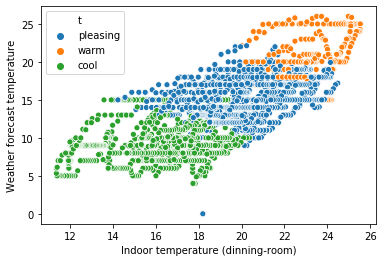

In [73]:
sns.scatterplot(df1['Indoor temperature (dinning-room)'],df['Weather forecast temperature'],hue=df['t'])

In [74]:
X = df[['Indoor temperature (dinning-room)','Weather forecast temperature']].to_numpy()
y = df['t'].to_numpy()

In [75]:
reg = LogisticRegression()
reg.fit(X,y)

C:\Users\Panna\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Panna\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
reg.coef_

array([[-0.52186754, -0.46897188],
       [ 0.20198092,  0.10777147],
       [ 0.20988617,  0.38869445]])

In [77]:
reg.intercept_

array([ 15.10439465,  -5.1002868 , -12.8579637 ])

<font size="3">A line√°ris regresszi√≥hoz hasonl√≥an, itt is egyenesek illeszt√©se t√∂rt√©nik, a regresszi√≥ ehhez meghat√°rozza a megfelel≈ë ùúÉ √©rt√©keket. Ezek alapj√°n kisz√°m√≠tottam az egyeneseket, amelyek az egyes csoportok hat√°rvonalait k√∂zel√≠tik √©s vizu√°lisan is megjelen√≠tettem az eredm√©nyeket.</font>

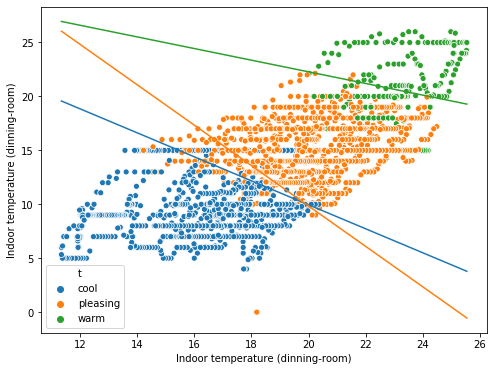

In [78]:
plt.figure(figsize=(8,6))
sns.scatterplot(df['Indoor temperature (dinning-room)'],df['Weather forecast temperature'],hue=df['t'],hue_order=['cool','pleasing','warm'])
for i in range(3):
    theta0 = reg.intercept_[i]
    theta1 = reg.coef_[i,0]
    theta2 = reg.coef_[i,1]
    x2 = -(theta0+theta1*df['Indoor temperature (dinning-room)'])/theta2
    sns.lineplot(df['Indoor temperature (dinning-room)'],x2)
# plt.ylim((0,35));

In [79]:
reg.predict([[17,10],[23,20],[16,15]])

array(['cool', 'pleasing', 'pleasing'], dtype=object)

<font size="3">A logisztikus regresszi√≥ eredm√©ny√©t felhaszn√°lva, predikt√°l√°s sor√°n a param√©terk√©nt megadott pontr√≥l a modell eld√∂nti, hogy mely csoportba tartozik. A p√©lda szerint, a (17,10) pont a 'cool' csoportba soroland√≥.</font>

In [80]:
reg.predict_proba([[17,10]])

array([[0.69511259, 0.30110506, 0.00378235]])

<font size="3">Megfigyelhet≈ë, hogy a param√©terk√©nt megadott pont mely csoportba, h√°ny sz√°zal√©kos val√≥sz√≠n≈±s√©ggel soroland√≥.</font>

<font size="3">A plotol√°s alapj√°n ugyanakkor az is megfigyelhet≈ë, hogy a modell illeszt√©se nem t√∫l pontos. P√©ld√°ul a "warm" c√≠mk√©hez tartoz√≥ √©rt√©kek jelent≈ës r√©sze ker√ºl besorol√°sra a "pleasing" csoportba.</font>

*** 

### Oszt√°lyoz√°si m√≥dszerek, g√©pi tanul√°s

<font size="3">Az oszt√°lyoz√°s l√©trehoz√°s√°hoz sz√ºks√©ges diszkr√©t √©rt√©keket tartalmaz√≥ attrib√∫tumnak (oszt√°lyc√≠mke) a fentebb l√©trehozott ___t___ attrib√∫tumot v√°lasztottam. Ebbe az oszlopba h√°romf√©le √©rt√©k figyelhet≈ë meg: ___cool___, ___pleasing___ valamint ___warm___. Ezek √©rt√©ke az Outdoor temperature oszlop √©rt√©keit≈ël f√ºgg.</font>

<font size="3">A korrel√°ci√≥s t√°bl√°zat √©rt√©keit megvizsg√°lva v√°lasztottam ki az algoritmus tan√≠t√°s√°hoz sz√ºks√©ges attrib√∫tumokat. Nem ker√ºltek kiv√°laszt√°sra azok az oszlopok amelyeket elt√°vol√≠tottam a tiszt√≠t√°si szakaszban (mert nem relev√°ns √©rt√©keket tartalmaztak), az Outdoor temperature, hiszen a predikt√°land√≥ √©rt√©keket ebb≈ël sz√°rmaztattam, valamint a Date, Time √©s a Day of Week attrib√∫tumok, mivel ezek nem relev√°nsak az oszt√°lyoz√°s szempontj√°b√≥l. </font>

In [81]:
subdf1 = df.loc[:,'Indoor temperature (dinning-room)':'Sun irradiance, in W/m2']
subdf2 = df.loc[:,'Outdoor relative humidity, in %']
subdf = pd.concat([subdf1,subdf2], axis=1)
subdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 17 columns):
Indoor temperature (dinning-room)        2764 non-null float64
Indoor temperature (room)                2764 non-null float64
Weather forecast temperature             2764 non-null float64
Carbon dioxide in ppm (dinning room)     2764 non-null float64
Carbon dioxide in ppm (room)             2764 non-null float64
Relative humidity (dinning room) in %    2764 non-null float64
Relative humidity (room) in %            2764 non-null float64
Lighting (dinning room), in Lux          2764 non-null float64
Lighting (room), in Lux                  2764 non-null float64
Rain                                     2764 non-null float64
Sun dusk                                 2764 non-null float64
Wind, in m/s                             2764 non-null float64
Sun light in west facade, in Lux         2764 non-null float64
Sun light in east facade, in Lux         2764 non-null float64
Sun light i

In [82]:
subdf.head(10)

Indoor temperature (dinning-room)  Indoor temperature (room)  \
0                            18.1875                    17.8275   
1                            18.4633                    18.1207   
2                            18.7673                    18.4367   
3                            19.0727                    18.7513   
4                            19.3721                    19.0414   
5                            19.6407                    19.2773   
6                            19.9120                    19.5367   
7                            20.1640                    19.7307   
8                            20.4120                    19.9693   
9                            20.6400                    20.1407   

   Weather forecast temperature  Carbon dioxide in ppm (dinning room)  \
0                           0.0                              214.9484   
1                           6.8                              214.9484   
2                          17.0                              214.9484   
3                          18.0                              214.9484   
4                          20.0                              214.9484   
5                          20.0                              214.9484   
6                          20.0                              214.9484   
7                          20.0                              214.9484   
8                          20.0                              214.9484   
9                          20.0                              214.9484   

   Carbon dioxide in ppm (room)  Relative humidity (dinning room) in %  \
0                      217.3837                                39.9125   
1                      217.3837                                39.9267   
2                      217.3837                                39.7720   
3                      217.0450                                39.7760   
4                      216.0800                                39.7757   
5                      216.0110                                39.8107   
6                      215.8290                                39.8613   
7                      215.2960                                39.8240   
8                      214.5490                                39.9587   
9                      213.9090                                39.9400   

   Relative humidity (room) in %  Lighting (dinning room), in Lux  \
0                        42.4150                         78.22561   
1                        42.2453                         78.22561   
2                        42.2267                         78.22561   
3                        42.0987                         78.22561   
4                        42.0686                         78.22561   
5                        42.0347                         78.22561   
6                        41.9947                         78.22561   
7                        41.9947                         78.22561   
8                        42.1253                         78.22561   
9                        42.0427                         78.22561   

   Lighting (room), in Lux  Rain  Sun dusk  Wind, in m/s  \
0                 113.5200   0.0   623.360       1.42625   
1                 113.6050   0.0   623.211       1.59200   
2                 113.6000   0.0   622.656       1.89133   
3                 113.3440   0.0   622.571       1.82800   
4                 113.0340   0.0   622.400       2.36071   
5                 113.6000   0.0   622.400       2.06333   
6                 112.9810   0.0   622.400       2.23067   
7                 111.2590   0.0   621.803       1.92400   
8                  83.3547   0.0   620.651       2.51067   
9                  83.3600   0.0   620.309       2.65333   

   Sun light in west facade, in Lux  Sun light in east facade, in Lux  \
0                          9690.240                          12604.20   
1                         11022.000                          10787.20   
2     

In [83]:
X = subdf
y = df['t']

<font size="3">Az adathalmazt tanul√≥ √©s teszthalmazra bontottam √∫gy, hogy az adathalmaz 80%-a a tanul√≥ halmazt adja ki, √©s a predikt√°land√≥ √©rt√©kek mind k√©t halmazban azonos ar√°nyban forduljanak el≈ë. </font>

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y)

In [85]:
y_test.value_counts()/y_test.shape[0]

pleasing    0.556962
cool        0.345389
warm        0.097649
Name: t, dtype: float64

In [86]:
y_train.value_counts()/y_train.shape[0]

pleasing    0.557214
cool        0.344640
warm        0.098146
Name: t, dtype: float64

In [87]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2211, 17), (553, 17), (2211,), (553,))

<font size="3">Az oszt√°lyoz√°shoz sz√ºks√©ges attrib√∫tumokat normaliz√°ltam.</font>

In [88]:
from sklearn import preprocessing

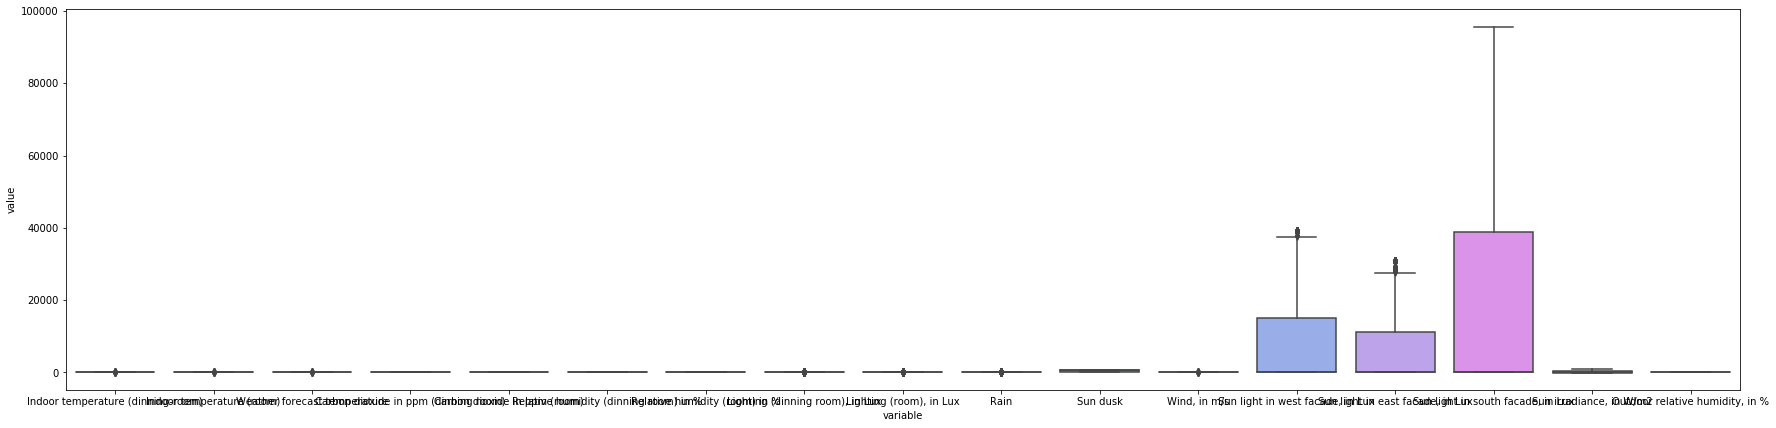

In [89]:
plt.figure(figsize=(30,7))
sns.boxplot(x="variable", y="value", data=pd.melt(X));

In [90]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [91]:
scaler.mean_

array([1.92249202e+01, 1.88540560e+01, 1.39077948e+01, 2.05698425e+02,
       2.07692622e+02, 4.48875896e+01, 4.72924265e+01, 2.67854832e+01,
       3.92962003e+01, 4.60726665e-02, 3.27934749e+02, 1.11158949e+00,
       1.00722238e+04, 7.96426578e+03, 2.27694027e+04, 2.20951608e+02,
       5.58513867e+01])

In [92]:
scaler.scale_

array([2.82284287e+00, 2.79373943e+00, 4.18661479e+00, 6.98441258e+00,
       7.45291242e+00, 6.57954221e+00, 7.54703493e+00, 2.26202729e+01,
       3.80558356e+01, 2.03916692e-01, 3.04786924e+02, 1.15527413e+00,
       1.40044330e+04, 1.09876967e+04, 3.32525009e+04, 3.01709022e+02,
       1.29135657e+01])

In [93]:
X_train_normalized = scaler.transform(X_train)

In [94]:
X_train_normalized.mean(axis=0)

array([ 2.76375736e-16, -2.37811680e-16,  8.67691265e-17, -3.48683342e-16,
        3.82185865e-15,  5.93725782e-16, -3.36632074e-16, -7.39144411e-17,
        1.86392938e-16, -3.21367135e-18, -1.30153690e-16,  5.94529200e-17,
        1.12478497e-17, -8.43588730e-17,  6.90939341e-17, -7.23076054e-17,
        2.89230422e-17])

In [95]:
X_train_normalized.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

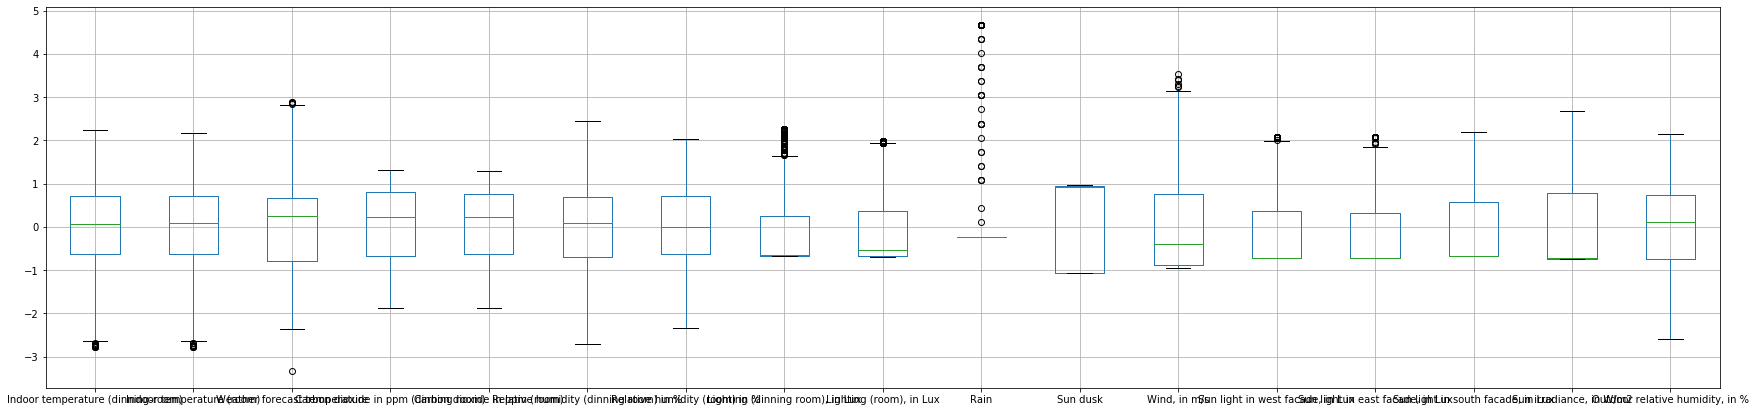

In [96]:
subdf_train_normalized = X_train.copy()
subdf_train_normalized.loc[:,'Indoor temperature (dinning-room)':'Outdoor relative humidity, in %'] = X_train_normalized
plt.figure(figsize=(30,7))
subdf_train_normalized.boxplot();

 ***

<font size="3">Az oszt√°lyoz√°s egy olyan f c√©lf√ºggv√©ny megtanul√°s√°nak a feladata, amely attrib√∫tum√©rt√©kek minden egyes x halmaz√°hoz el≈ëre defini√°lt oszt√°lyc√≠mk√©k valamelyik√©t ( y ) rendeli hozz√°. Az oszt√°lyoz√°s megval√≥s√≠t√°s√°hoz √©n a ___Logisztikus Regresszi√≥___t v√°lasztottam.</font>

<font size="3">A Logisztikus Regresszi√≥ (m√°s oszt√°lyoz√≥ modellekhez hasonl√≥an) egy tanul√≥ algoritmust alkalmaz annak a modellnek a megtal√°l√°s√°ra, amely a legjobban illeszkedik a bemen≈ë adatok attrib√∫tumai √©s oszt√°lyc√≠mk√©i k√∂z√∂tti kapcsolatra. A gener√°lt modellnek j√≥l kell illeszkednie a bemen≈ë adatokra, √©s helyesen kell megj√≥solnia a kor√°bban nem l√°tott rekordok oszt√°lyc√≠mk√©it.</font>

<font size="3">A tanul√≥halmaz a kor√°bban l√©trehozott X_train (rekordok) √©s y_train (hozz√°juk tartoz√≥ oszt√°lyc√≠mke) elemeib≈ël √©p√ºl fel. A teszthalmaz a kor√°bban szint√©n l√©trehozott X_test (rekordok) √©s y_test (hozz√°juk tartoz√≥ oszt√°lyc√≠mke) adataib√≥l √©p√ºl fel.</font>

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
reg = LogisticRegression(max_iter=100000)
reg.fit(X_train,y_train)

C:\Users\Panna\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Panna\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
predicted = reg.predict(X_test)
list(zip(predicted,y_test))

[('cool', 'cool'),
 ('warm', 'pleasing'),
 ('pleasing', 'pleasing'),
 ('pleasing', 'pleasing'),
 ('pleasing', 'pleasing'),
 ('pleasing', 'pleasing'),
 ('pleasing', 'pleasing'),
 ('pleasing', 'pleasing'),
 ('pleasing', 'pleasing'),
 ('cool', 'pleasing'),
 ('warm', 'warm'),
 ('cool', 'cool'),
 ('pleasing', 'pleasing'),
 ('pleasing', 'pleasing'),
 ('pleasing', 'pleasing'),
 ('pleasing', 'pleasing'),
 ('cool', 'pleasing'),
 ('pleasing', 'cool'),
 ('cool', 'cool'),
 ('pleasing', 'pleasing'),
 ('warm', 'pleasing'),
 ('pleasing', 'pleasing'),
 ('cool', 'cool'),
 ('pleasing', 'pleasing'),
 ('pleasing', 'cool'),
 ('cool', 'cool'),
 ('pleasing', 'pleasing'),
 ('pleasing', 'pleasing'),
 ('pleasing', 'cool'),
 ('pleasing', 'cool'),
 ('pleasing', 'cool'),
 ('cool', 'cool'),
 ('pleasing', 'pleasing'),
 ('pleasing', 'pleasing'),
 ('cool', 'cool'),
 ('warm', 'warm'),
 ('cool', 'cool'),
 ('cool', 'cool'),
 ('pleasing', 'warm'),
 ('pleasing', 'pleasing'),
 ('cool', 'cool'),
 ('cool', 'cool'),
 ('pleasin

In [100]:
from sklearn.metrics import accuracy_score
print("Test accuracy:")
accuracy_score(y_test, predicted)

Test accuracy:


0.9023508137432188

In [101]:
from sklearn.metrics import accuracy_score
print("Train accuracy:")
accuracy_score(y_train, reg.predict(X_train))

Train accuracy:


0.8783355947535052

<font size="3">A gener√°lt modell a teszthalmazon 87.7%-os, a tanul√≥ halmazon 86.9%-os pontoss√°ggal k√©pes megadni a rekordokhoz tartoz√≥ oszt√°lyc√≠mk√©t.</font>

<font size="3">Hab√°r a modell viszonylag j√≥l teljes√≠t, a predikt√°l√°s pontoss√°g√°n seg√≠thet az adathalmaz elemsz√°m√°nak n√∂vel√©se, √≠gy nagyobb tanul√≥halmazon tudna a modell betanulni.</font>

***